In [20]:
import pandas as pd
import numpy as np
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras.layers import *
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('df_2102.csv')

sensor_id = [329, 332, 335]
freezer_id = [344, 362, 368]

In [21]:
df_prime = df.copy()

In [22]:
for i in range(1,21):
    df_prime['temperature_329_p'+str(i)] = df_prime['temperature_329'].shift(-i)

In [23]:
df_prime[['temperature_329']+['temperature_329_p'+str(i) for i in range(1,21)]]

temperature_329  temperature_329_p1  temperature_329_p2  \
0               -20.30              -20.31              -20.31   
1               -20.31              -20.31              -20.31   
2               -20.31              -20.31              -20.30   
3               -20.31              -20.30              -20.31   
4               -20.30              -20.31              -20.30   
...                ...                 ...                 ...   
80124           -18.94              -18.95              -18.93   
80125           -18.95              -18.93              -18.95   
80126           -18.93              -18.95              -18.93   
80127           -18.95              -18.93                 NaN   
80128           -18.93                 NaN                 NaN   

       temperature_329_p3  temperature_329_p4  temperature_329_p5  \
0                  -20.31              -20.30              -20.31   
1                  -20.30              -20.31              -20.30   
2                  -20.31              -20.30              -20.30   
3                  -20.30              -20.30              -20.29   
4                  -20.30              -20.29              -20.28   
...                   ...                 ...                 ...   
80124              -18.95              -18.93                 NaN   
80125              -18.93                 NaN                 NaN   
80126                 NaN                 NaN                 NaN   
80127                 NaN                 NaN                 NaN   
80128                 NaN                 NaN                 NaN   

       temperature_329_p6  temperature_329_p7  temperature_329_p8  \
0                  -20.30              -20.30              -20.29   
1                  -20.30              -20.29              -20.28   
2                  -20.29              -20.28              -20.29   
3                  -20.28              -20.29              -20.29   
4                  -20.29              -20.29              -20.29   
...                   ...                 ...                 ...   
80124                 NaN                 NaN                 NaN   
80125                 NaN                 NaN                 NaN   
80126                 NaN                 NaN                 NaN   
80127                 NaN                 NaN                 NaN   
80128                 NaN                 NaN                 NaN   

       temperature_329_p9  ...  temperature_329_p11  temperature_329_p12  \
0                  -20.28  ...               -20.29               -20.29   
1                  -20.29  ...               -20.29               -20.30   
2                  -20.29  ...               -20.30               -20.30   
3                  -20.29  ...               -20.30               -20.29   
4                  -20.30  ...               -20.29               -20.29   
...                   ...  ...                  ...                  ...   
80124                 NaN  ...                  NaN                  NaN   
80125                 NaN  ...                  NaN                  NaN   
80126                 NaN  ...                  NaN                  NaN   
80127                 NaN  ...                  NaN                  NaN   
80128                 NaN  ...                  NaN                  NaN   

       temperature_329_p13  temperature_329_p14  temperature_329_p15  \
0                   -20.30               -20.30               -20.29   
1                   -20.30               -20.29               -20.29   
2                   -20.29               -20.29               -20.29   
3                   -20.29               -20.29               -20.29   
4                   -20.29               -20.29               -20.29   
...                    ...                  ...                  ...   
80124                  NaN                  NaN                  NaN   
80125                  NaN                  NaN                  Na

In [7]:
import random
for _id in freezer_id:
    df_prime['operation_'+str(_id)+'_random'] = [random.randint(1,1) for r in range(len(df))]

In [8]:
cols = ['gw_time'] + ['temperature_329'] + ['temperature_329_p'+str(i) for i in range(1,21)] + ['dT_329'] + ['operation_'+str(_id) for _id in freezer_id] + ['operation_'+str(_id)+'_random' for _id in freezer_id]
df = df_prime[cols]

In [9]:
df.columns

Index(['gw_time', 'temperature_329', 'temperature_329_p1',
       'temperature_329_p2', 'temperature_329_p3', 'temperature_329_p4',
       'temperature_329_p5', 'temperature_329_p6', 'temperature_329_p7',
       'temperature_329_p8', 'temperature_329_p9', 'temperature_329_p10',
       'temperature_329_p11', 'temperature_329_p12', 'temperature_329_p13',
       'temperature_329_p14', 'temperature_329_p15', 'temperature_329_p16',
       'temperature_329_p17', 'temperature_329_p18', 'temperature_329_p19',
       'temperature_329_p20', 'dT_329', 'operation_344', 'operation_362',
       'operation_368', 'operation_344_random', 'operation_362_random',
       'operation_368_random'],
      dtype='object')

In [10]:
df = df.dropna()

In [11]:
TEST_SIZE = 8000
train = df[:-TEST_SIZE]
test = df[-TEST_SIZE:]
train.shape, test.shape

((72109, 29), (8000, 29))

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

for col in cols[1:-3]:
    train[col] = scaler.fit_transform(train[col].values.reshape(-1,1))
    test[col] = scaler.transform(test[col].values.reshape(-1,1))

C:\Users\Intellicode\AppData\Local\Temp\ipykernel_10848\1543602802.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = scaler.fit_transform(train[col].values.reshape(-1,1))
C:\Users\Intellicode\AppData\Local\Temp\ipykernel_10848\1543602802.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col] = scaler.transform(test[col].values.reshape(-1,1))
C:\Users\Intellicode\AppData\Local\Temp\ipykernel_10848\1543602802.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [13]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [14]:
feature_cols1 = ['operation_'+str(_id) for _id in freezer_id] + ['temperature_329']
feature_cols2 = ['operation_'+str(_id)+'_random' for _id in freezer_id] + ['temperature_329']
label_cols = ['temperature_329_p'+str(i) for i in range(1,21)]

In [15]:
print('feature columns: {}'.format(feature_cols1))
print('\nlabel columns: {}'.format(label_cols))

feature columns: ['operation_344', 'operation_362', 'operation_368', 'temperature_329']

label columns: ['temperature_329_p1', 'temperature_329_p2', 'temperature_329_p3', 'temperature_329_p4', 'temperature_329_p5', 'temperature_329_p6', 'temperature_329_p7', 'temperature_329_p8', 'temperature_329_p9', 'temperature_329_p10', 'temperature_329_p11', 'temperature_329_p12', 'temperature_329_p13', 'temperature_329_p14', 'temperature_329_p15', 'temperature_329_p16', 'temperature_329_p17', 'temperature_329_p18', 'temperature_329_p19', 'temperature_329_p20']


In [16]:
train_feature = train[feature_cols1]
train_label = train[label_cols]

# train dataset
train_feature, train_label = make_dataset(train_feature, train_label, 20)

# train, validation set 생성
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2, shuffle = False, random_state= 42)

x_train.shape, x_valid.shape
# ((57676, 20, 21), (14419, 20, 21))

((57671, 20, 4), (14418, 20, 4))

In [17]:
test_feature1 = test[feature_cols1]
test_feature2 = test[feature_cols2]
test_label = test[label_cols]
test_label2 = test_label.copy()
# test dataset (실제 예측 해볼 데이터)
test_feature1, test_label = make_dataset(test_feature1, test_label, 20)
test_feature2, test_label2 = make_dataset(test_feature2, test_label2, 20)
test_feature1.shape, test_label.shape

((7980, 20, 4), (7980, 20))

In [364]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(LSTM(64, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='tanh', 
               return_sequences=False))
model.add(Dense(20))
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)
filename = './tmp_checkpoint.h5'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                    epochs=300, 
                    batch_size=256,
                    validation_data=(x_valid, y_valid), 
                    callbacks=[early_stop, checkpoint],
                    verbose = 1,
                    shuffle = False)

Epoch 1/300
224/226 [============================>.] - ETA: 0s - loss: 0.0067
Epoch 1: val_loss improved from inf to 0.01853, saving model to .\tmp_checkpoint.h5
226/226 [==============================] - 4s 12ms/step - loss: 0.0067 - val_loss: 0.0185
Epoch 2/300
226/226 [==============================] - ETA: 0s - loss: 0.0026
Epoch 2: val_loss improved from 0.01853 to 0.00447, saving model to .\tmp_checkpoint.h5
226/226 [==============================] - 2s 9ms/step - loss: 0.0026 - val_loss: 0.0045
Epoch 3/300
219/226 [============================>.] - ETA: 0s - loss: 0.0013
Epoch 3: val_loss improved from 0.00447 to 0.00104, saving model to .\tmp_checkpoint.h5
226/226 [==============================] - 2s 8ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 4/300
219/226 [============================>.] - ETA: 0s - loss: 8.6147e-04
Epoch 4: val_loss improved from 0.00104 to 0.00066, saving model to .\tmp_checkpoint.h5
226/226 [==============================] - 2s 8ms/step - loss: 8.445

In [365]:
model.save('lstm_multioutput_model')

INFO:tensorflow:Assets written to: lstm_multioutput_model\assets


INFO:tensorflow:Assets written to: lstm_multioutput_model\assets


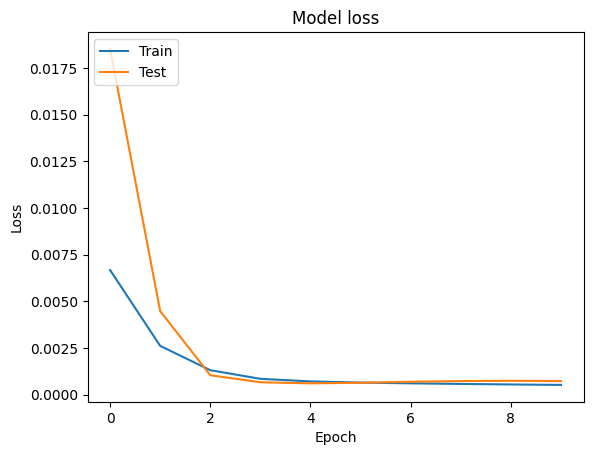

In [366]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [367]:
# weight 로딩
model.load_weights(filename)

# 예측
pred = model.predict(test_feature1)
pred2 = model.predict(test_feature2)

250/250 [==============================] - 1s 3ms/step


In [368]:
actual_label = [[test_label[x][i] for x in range(len(test_label))] for i in range(1, 20)]
pred_label = [[pred[x][i] for x in range(len(pred))] for i in range(1, 20)]
pred2_label = [[pred2[x][i] for x in range(len(pred2))] for i in range(1, 20)]

In [369]:
pred3_label = []
for i in range(int(len(pred)/20)):
    pred3_label += list(pred[i*20])

In [370]:
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_absolute_error

# print("MSE: ", mean_squared_error(test_label, pred))
# print("MAE: ", mean_absolute_error(test_label, pred))
# plt.figure(figsize=(24,10))
# plt.plot(actual_label[0], label='actual')
# plt.plot(pred_label[0], label='prediction')
# plt.legend()
# plt.show()

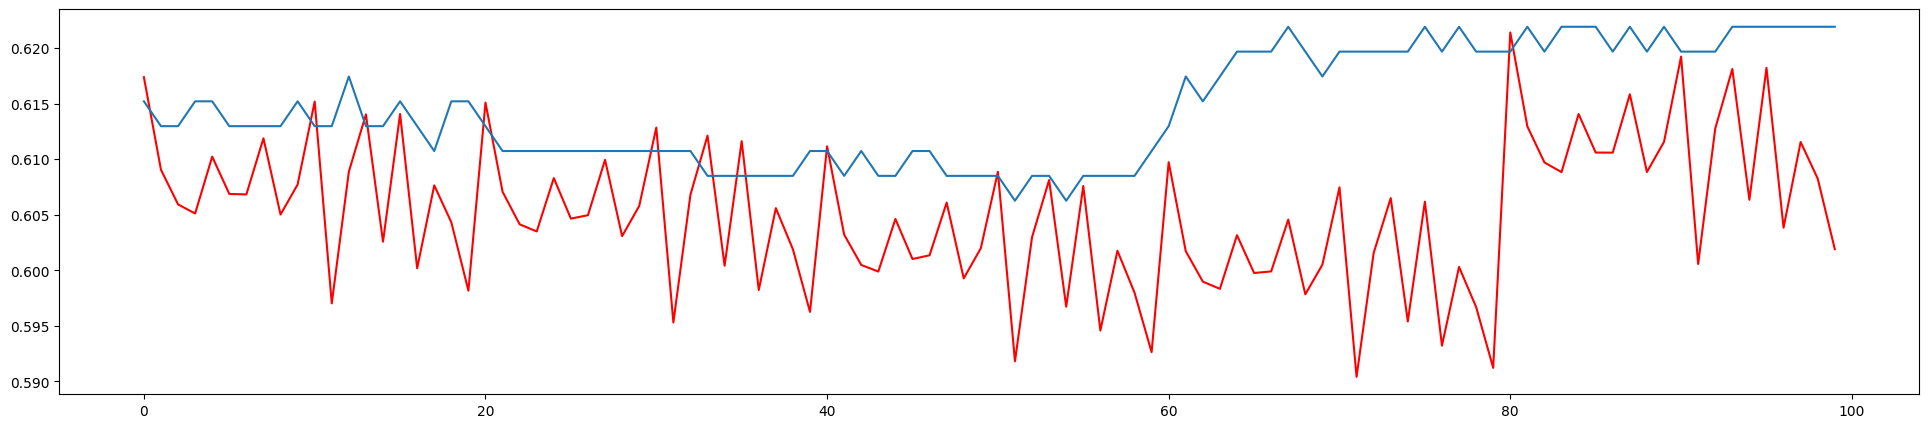

In [376]:
plt.figure(figsize=(24,5))
plt.plot(pred3_label[:100], alpha = 1,color = 'r')
plt.plot(actual_label[0][:100])

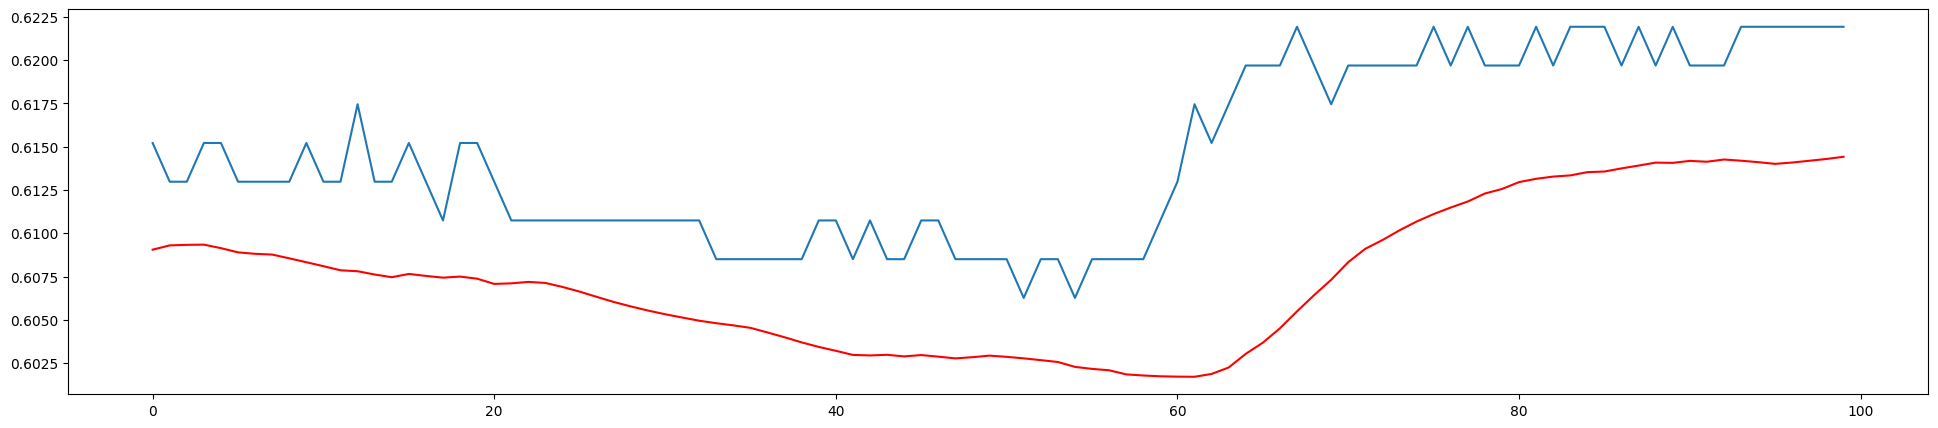

In [372]:
plt.figure(figsize=(24,5))
plt.plot(pred2_label[0][:100], alpha = 1,color = 'r')
plt.plot(actual_label[0][:100])

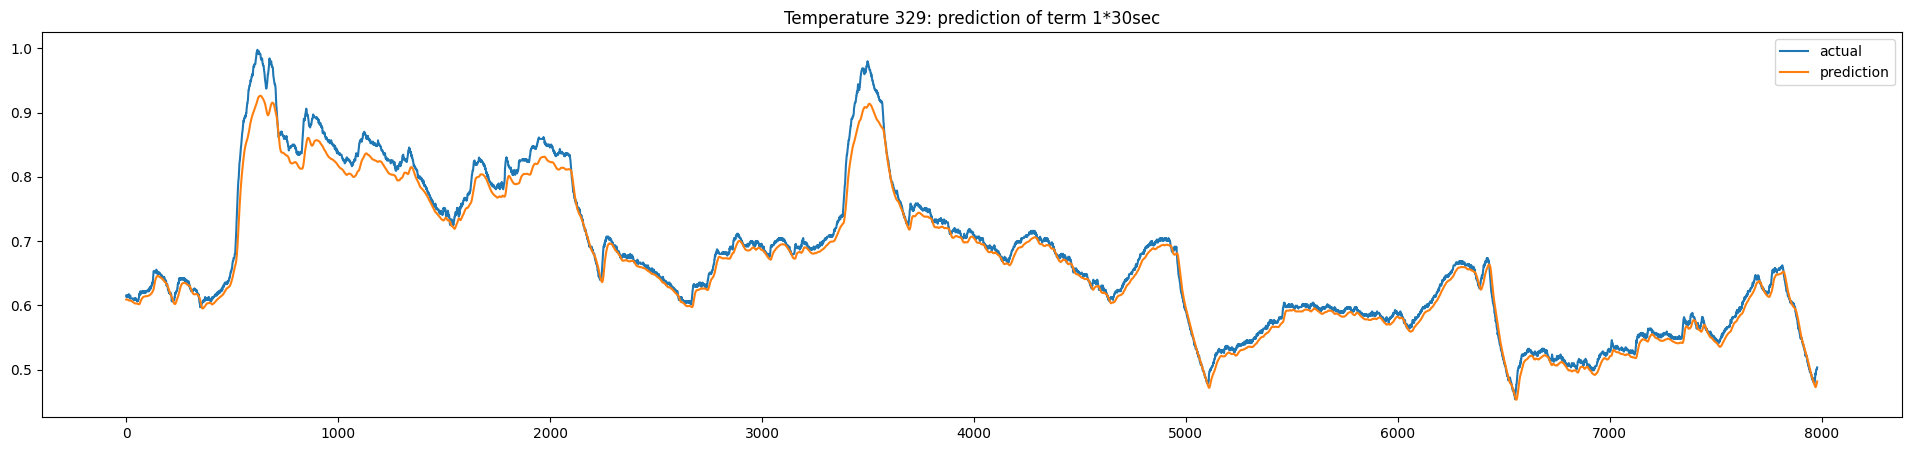

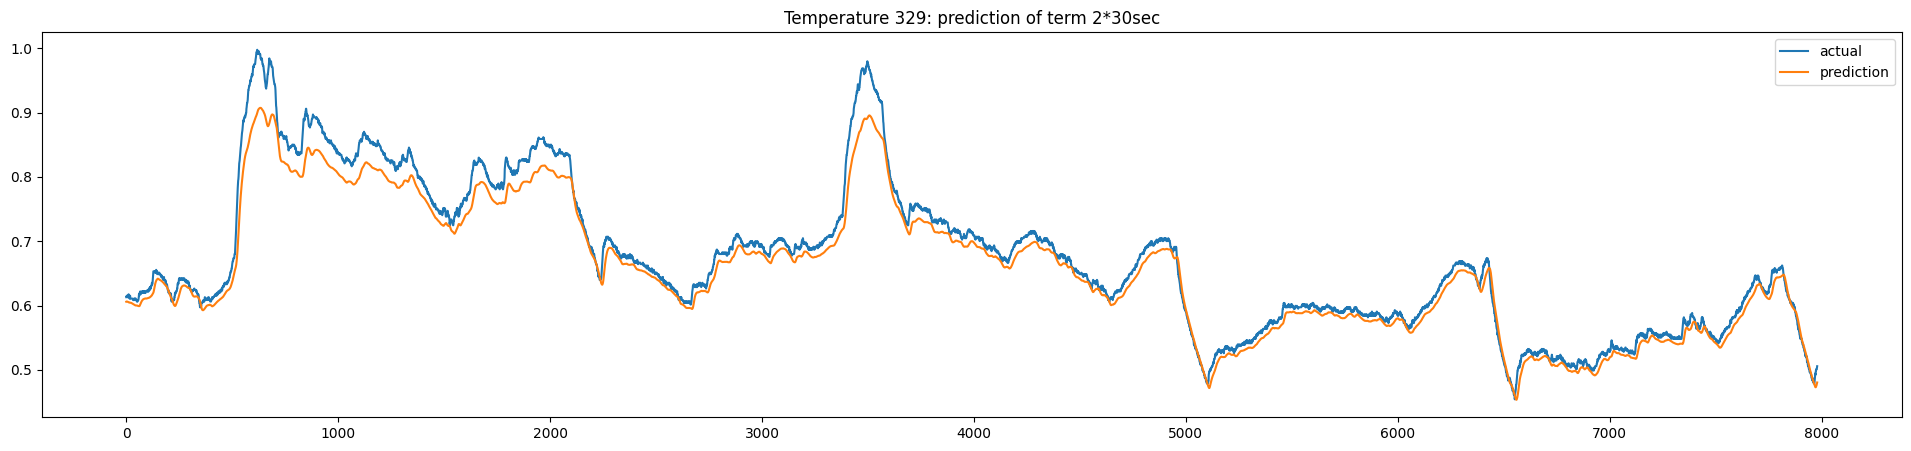

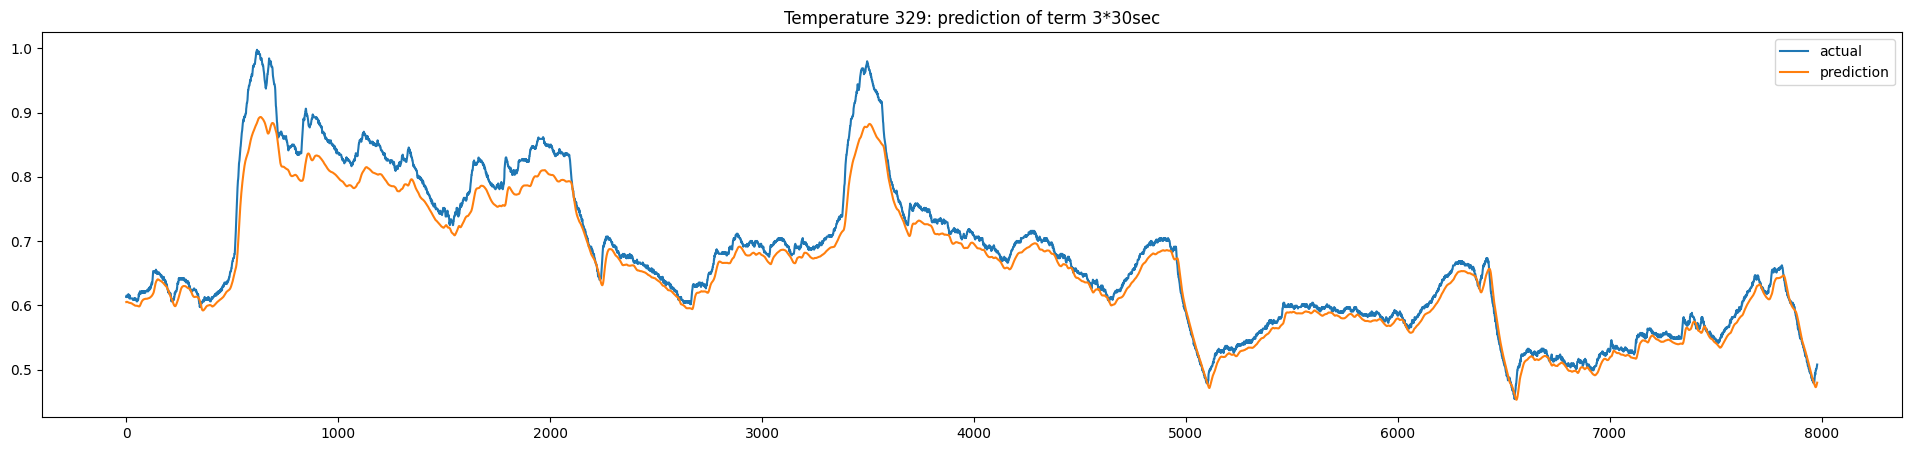

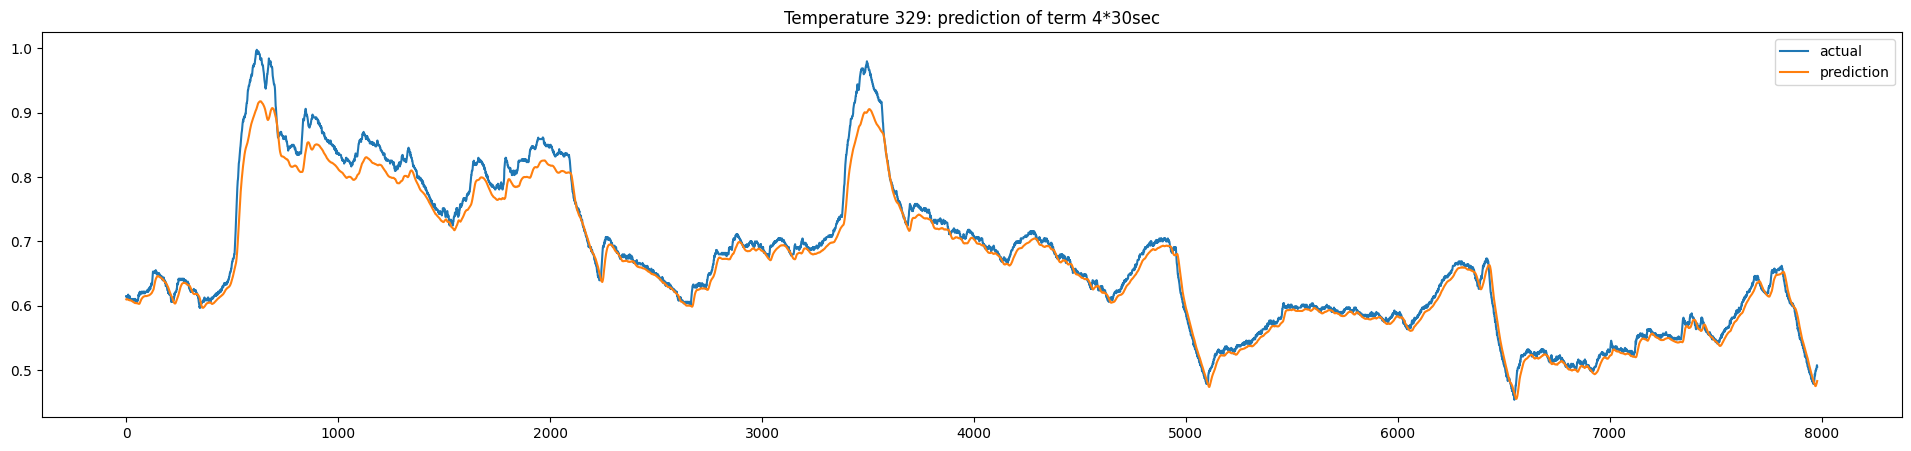

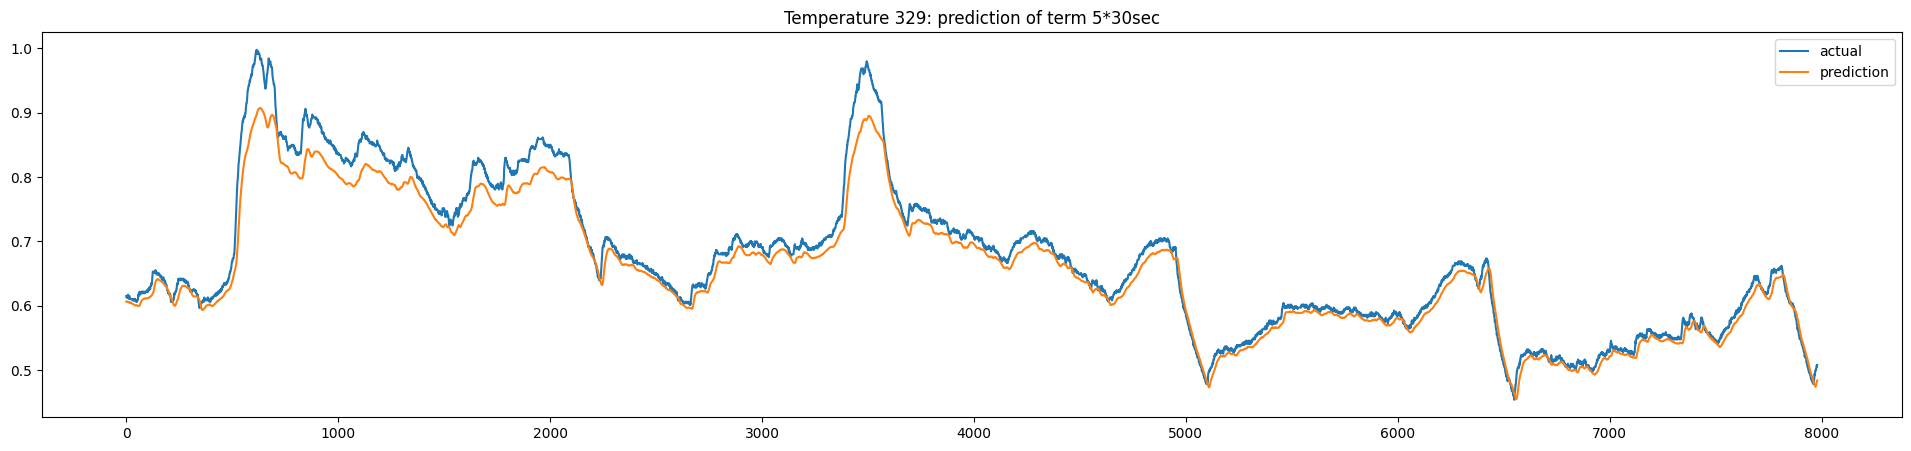

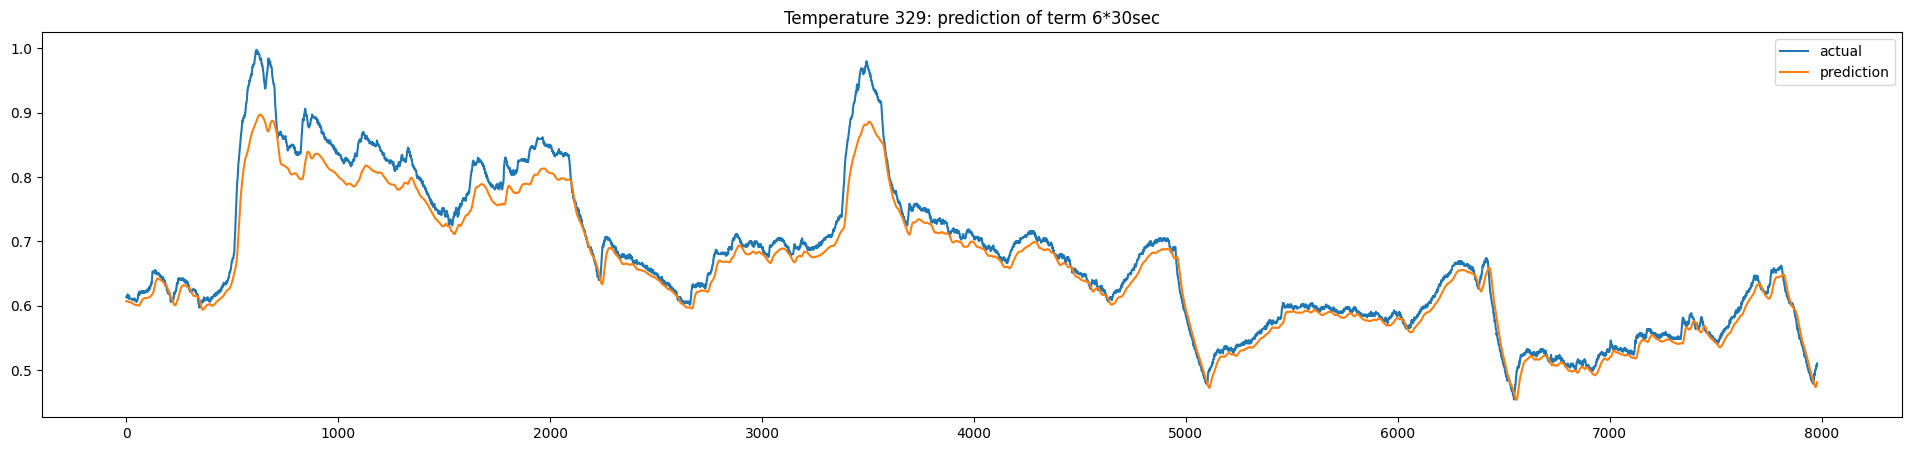

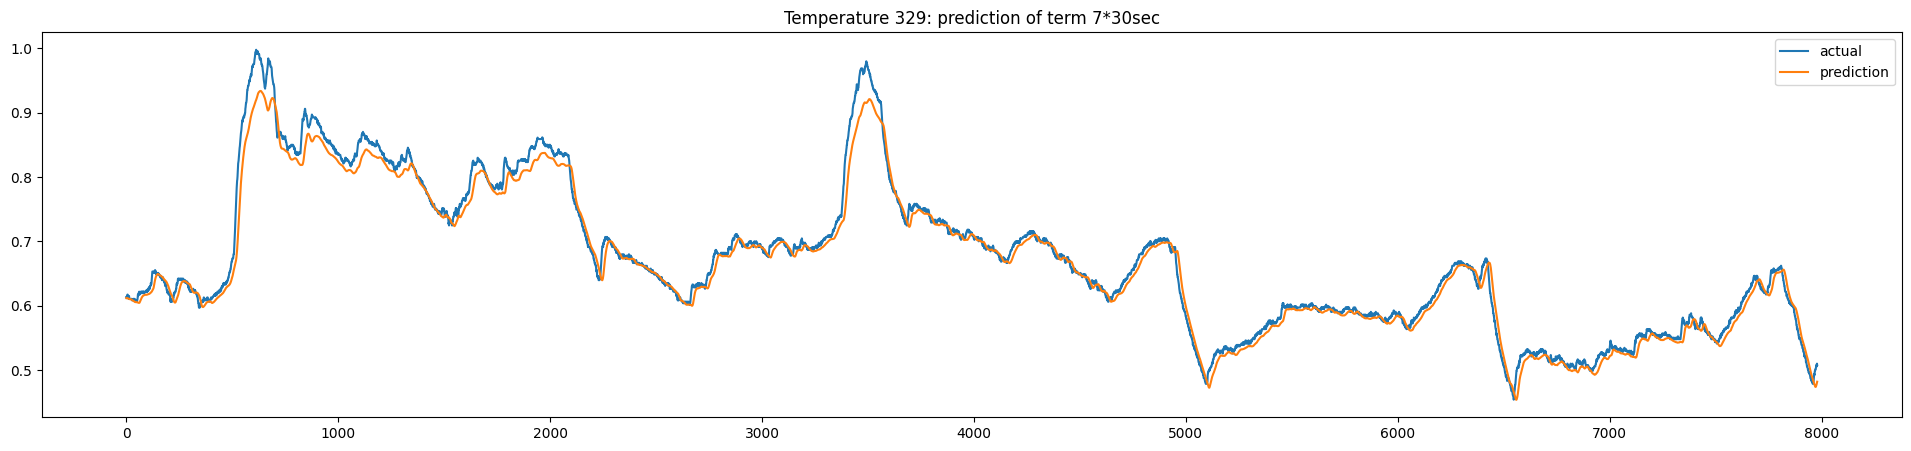

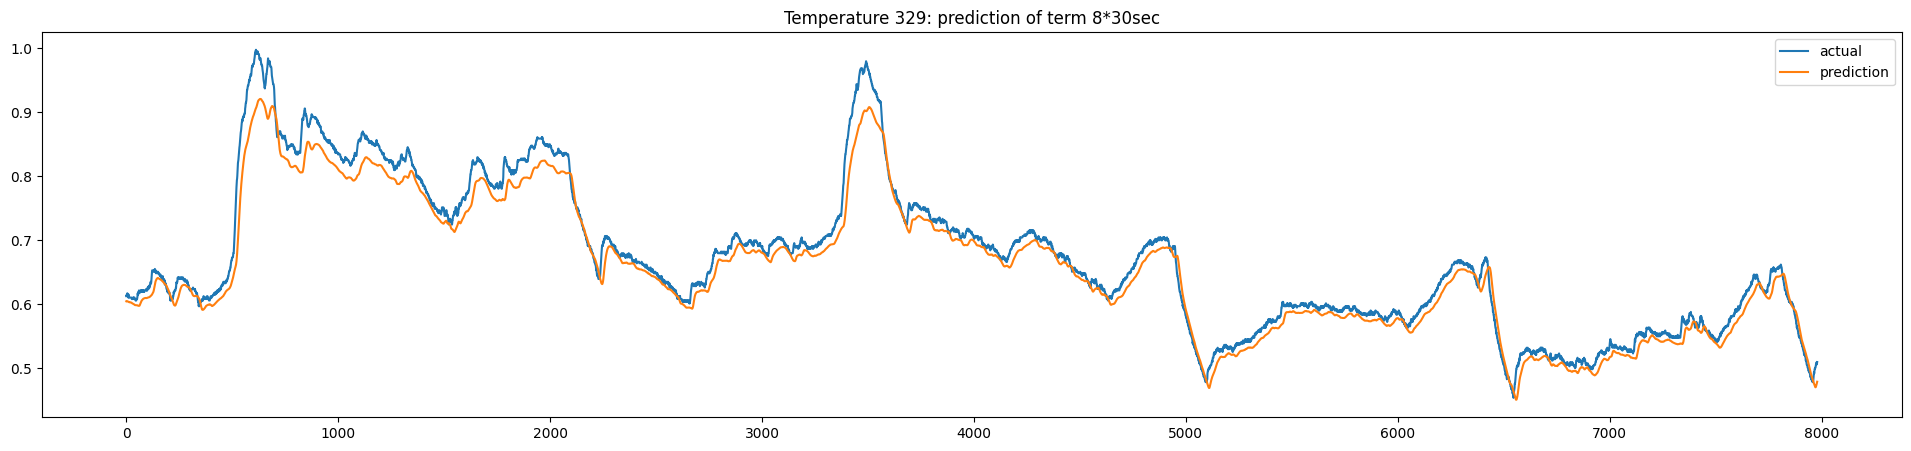

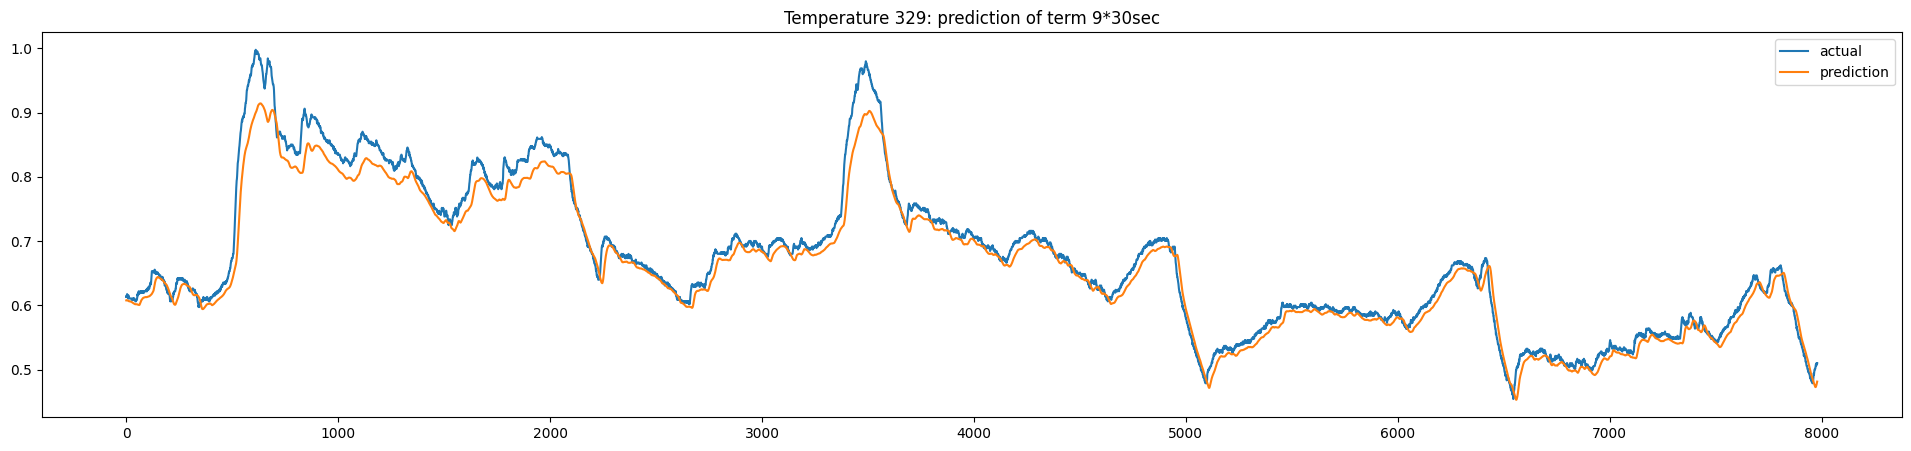

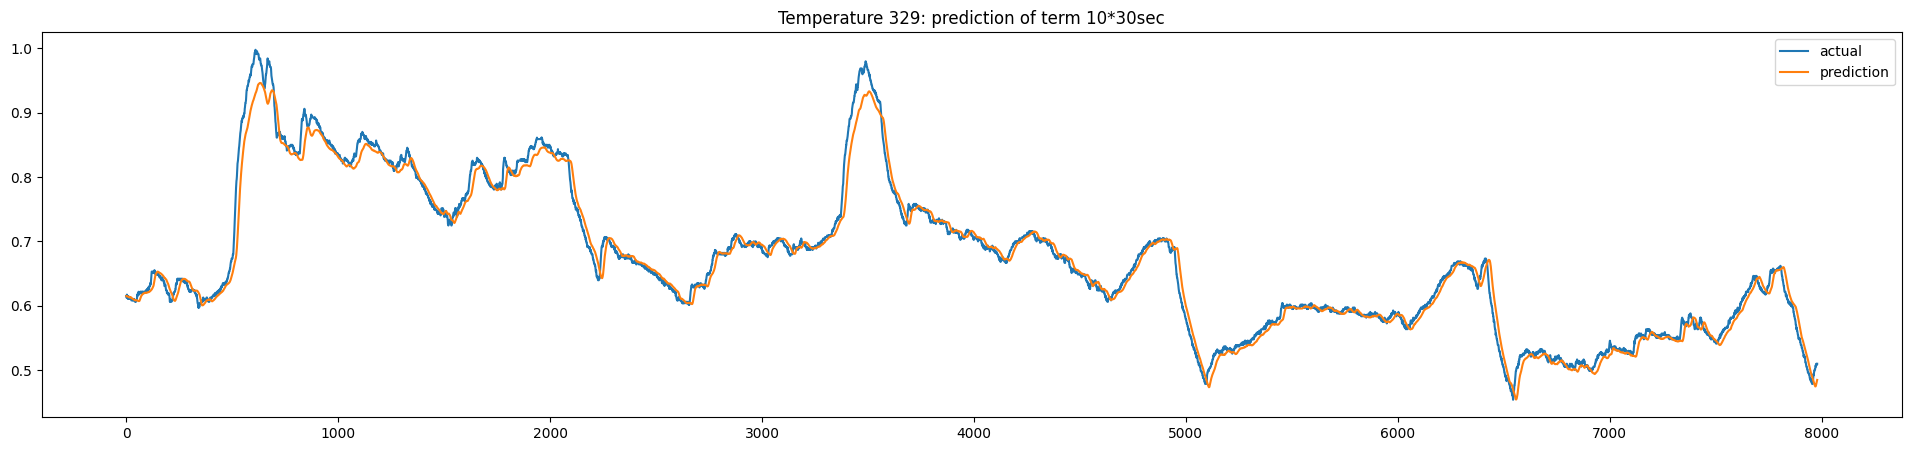

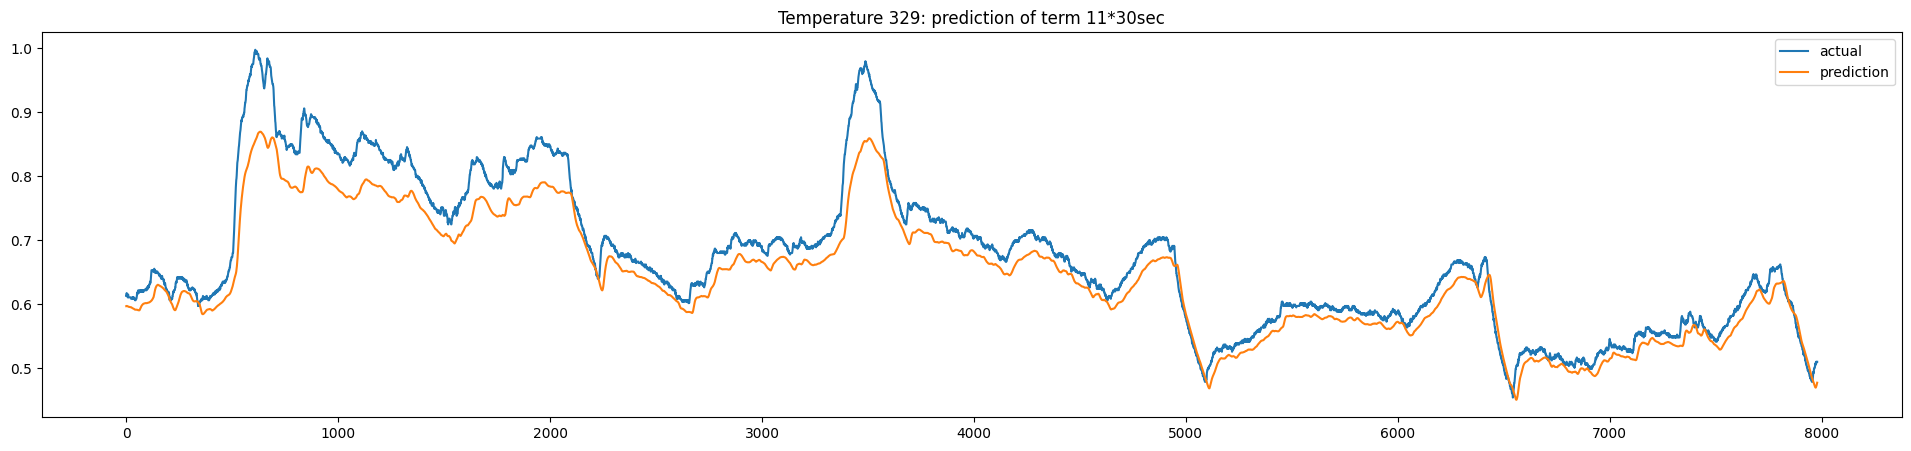

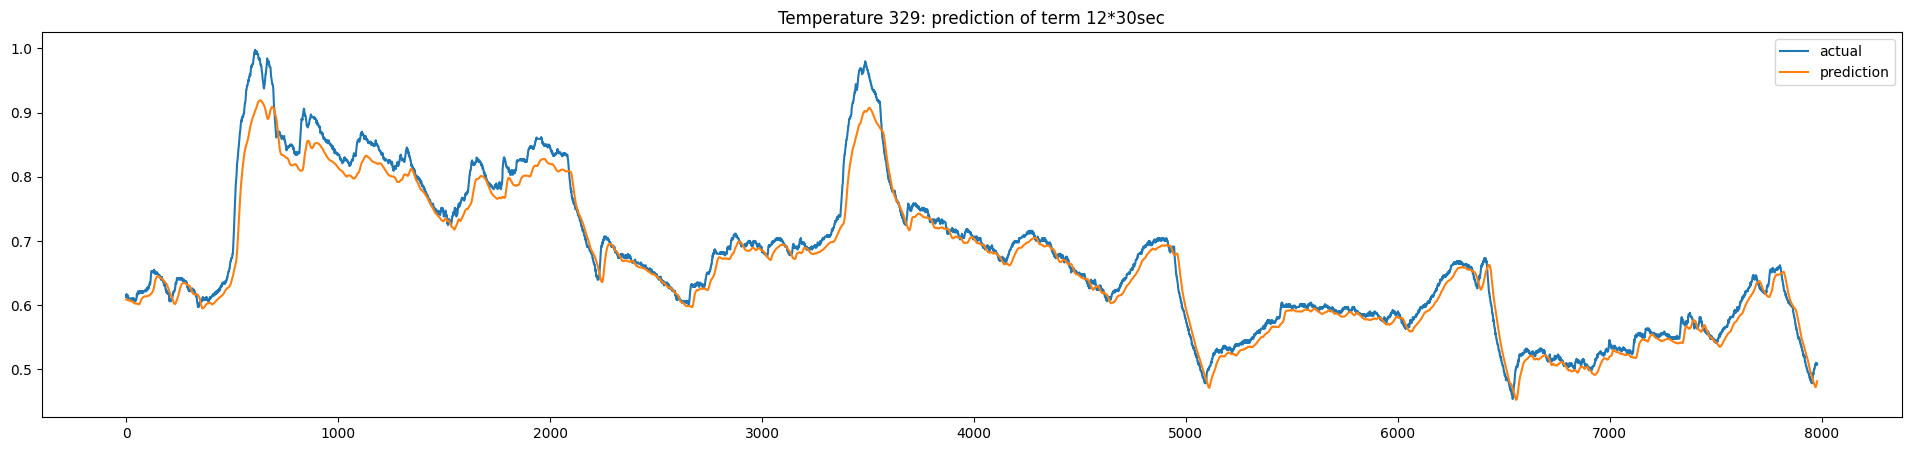

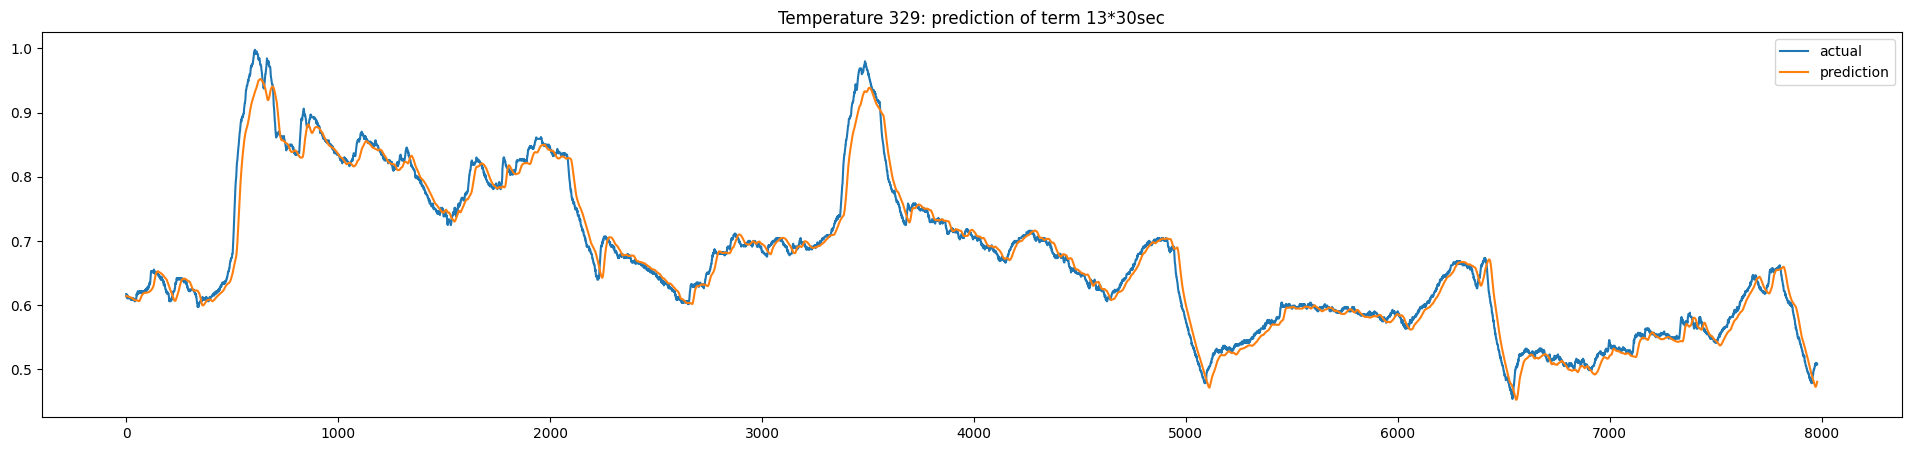

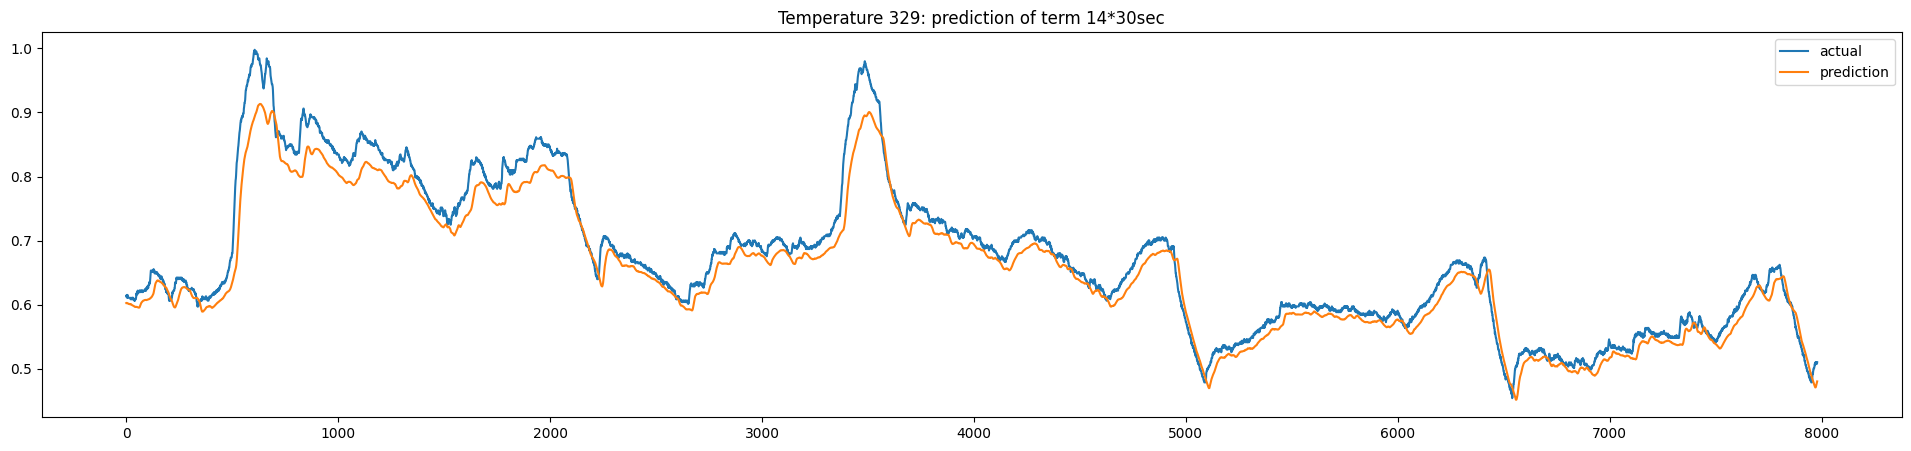

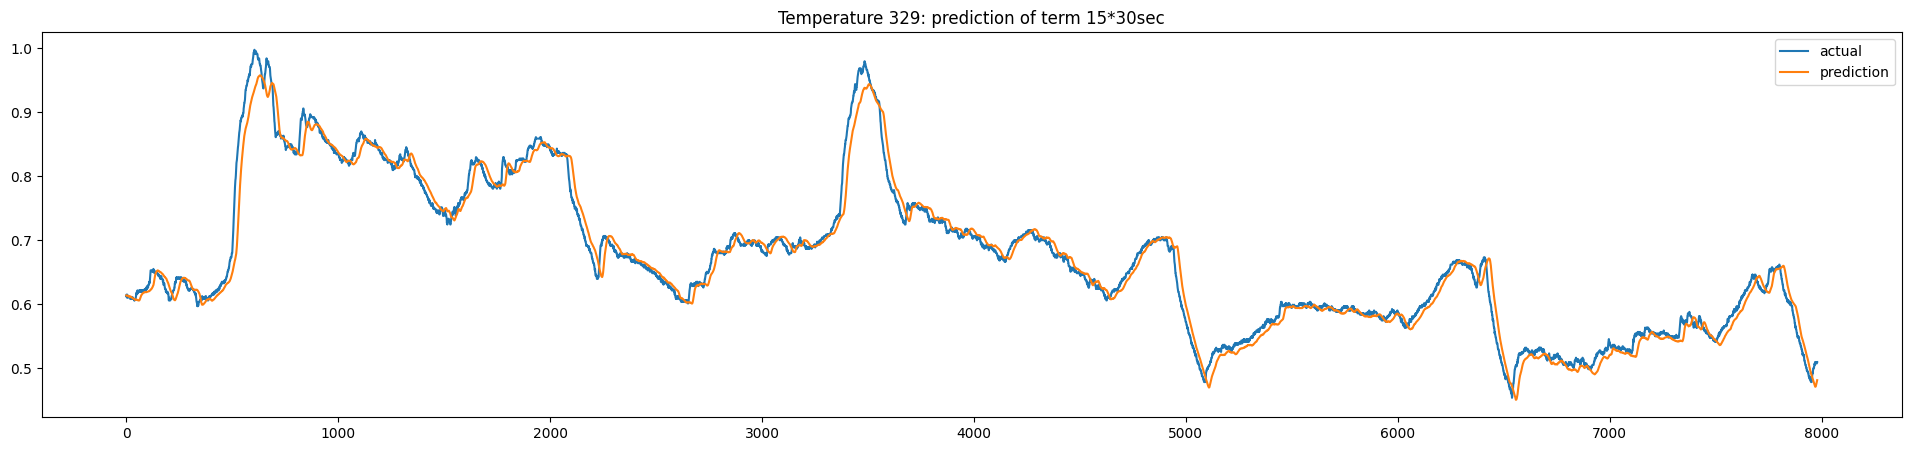

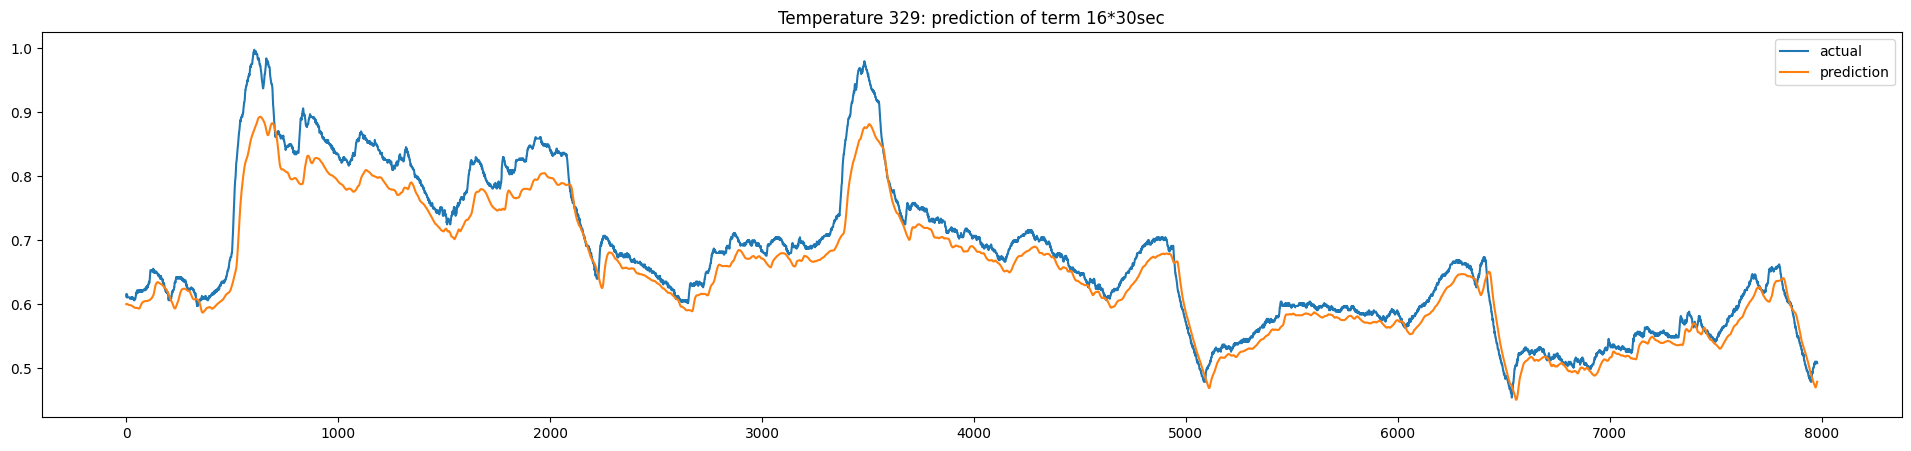

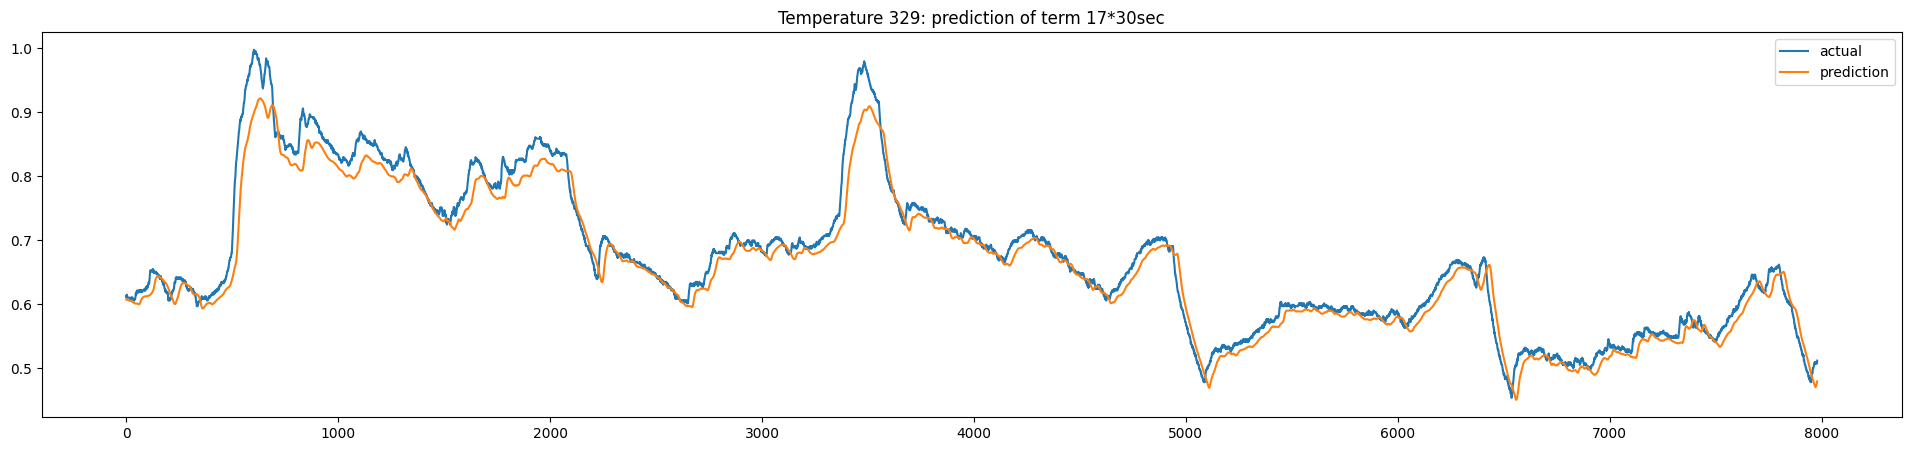

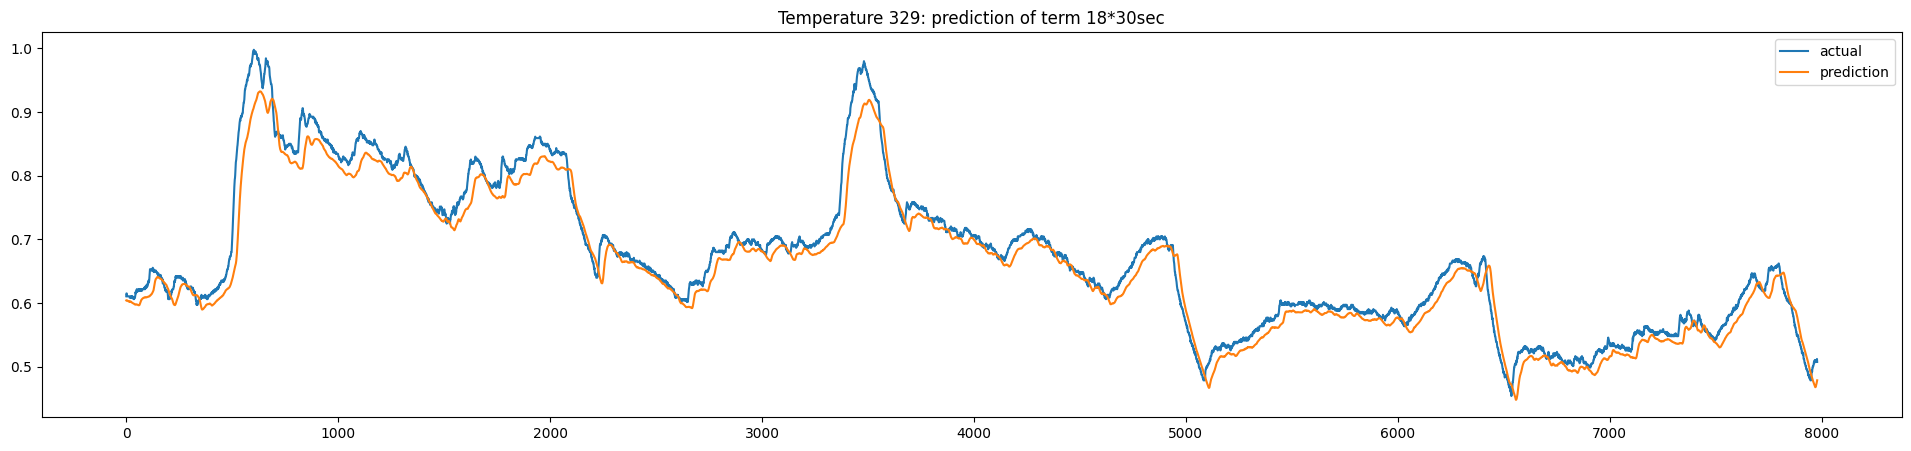

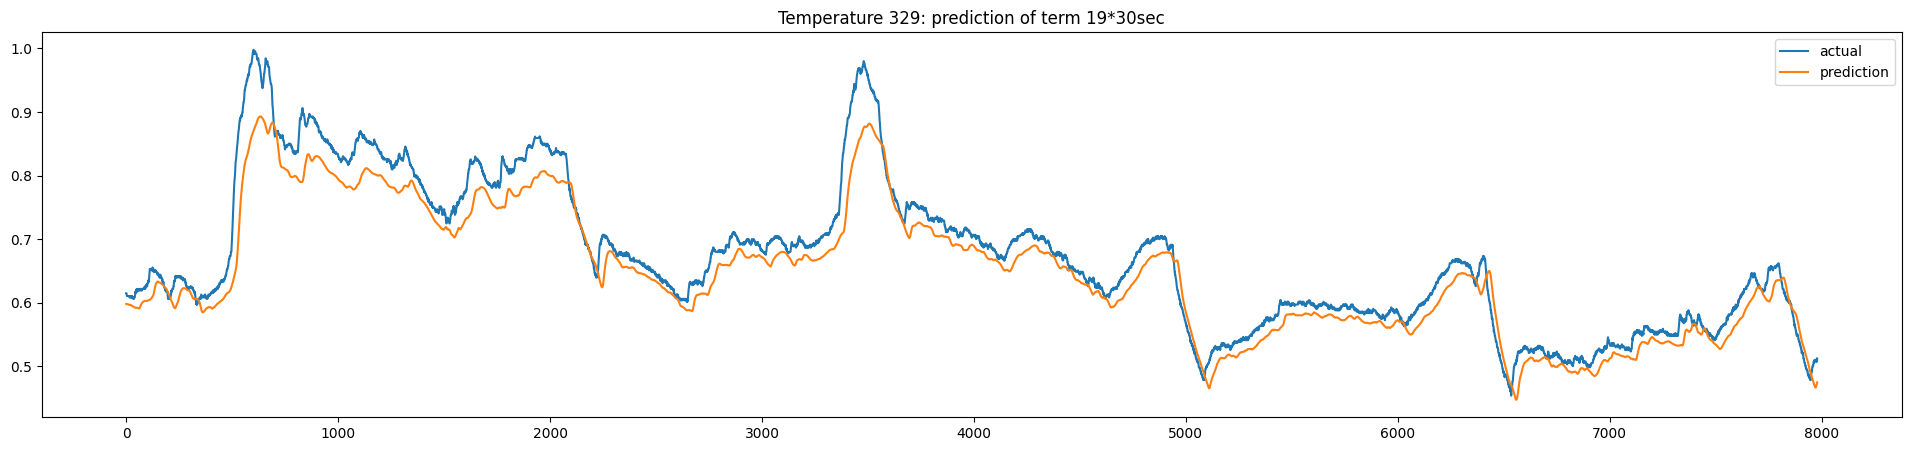

In [373]:
for i in range(len(actual_label)):

    plt.figure(figsize = (24,5))
    plt.title('Temperature 329: prediction of term {}*30sec'.format(i+1))
    plt.plot(actual_label[i], label='actual')
    plt.plot(pred_label[i], label='prediction')
    plt.legend()
    plt.show()

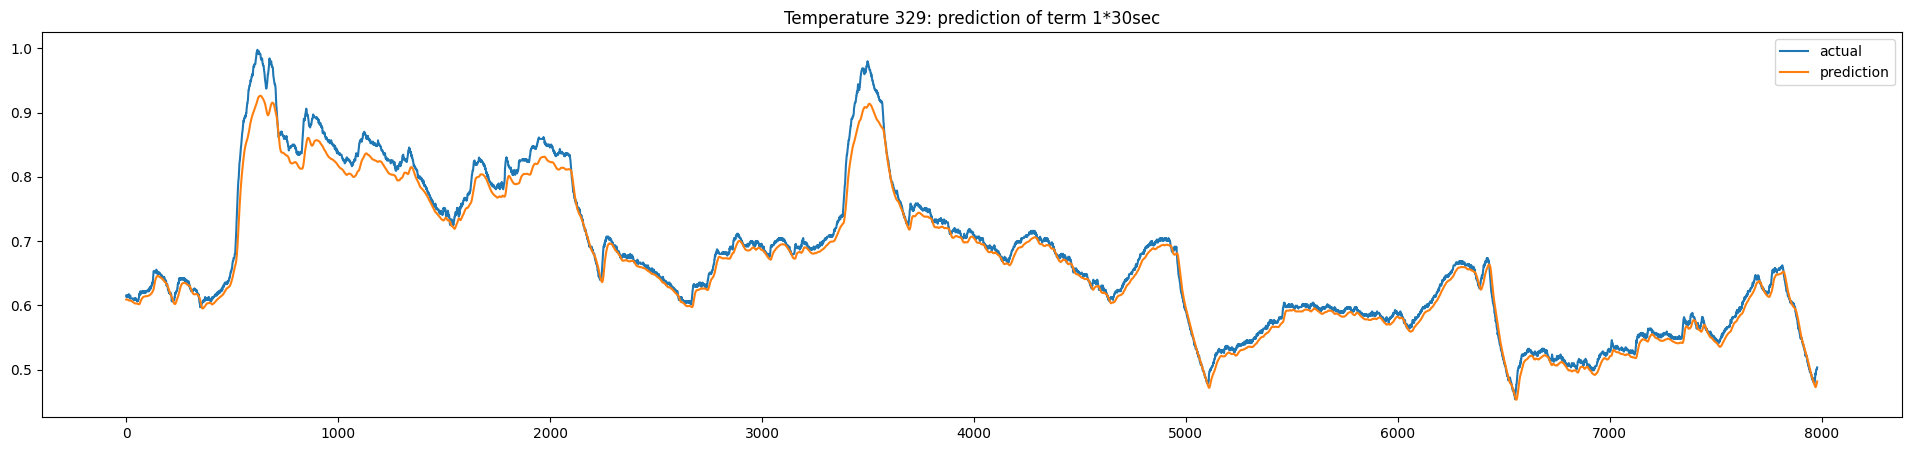

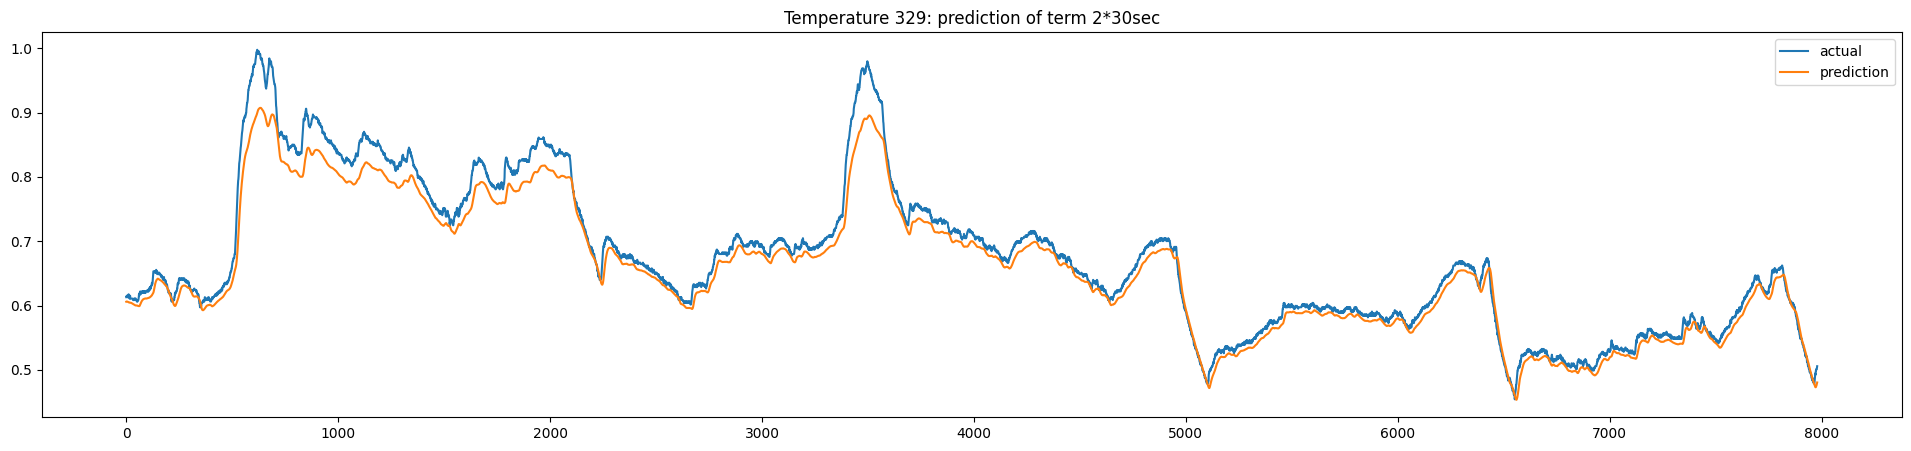

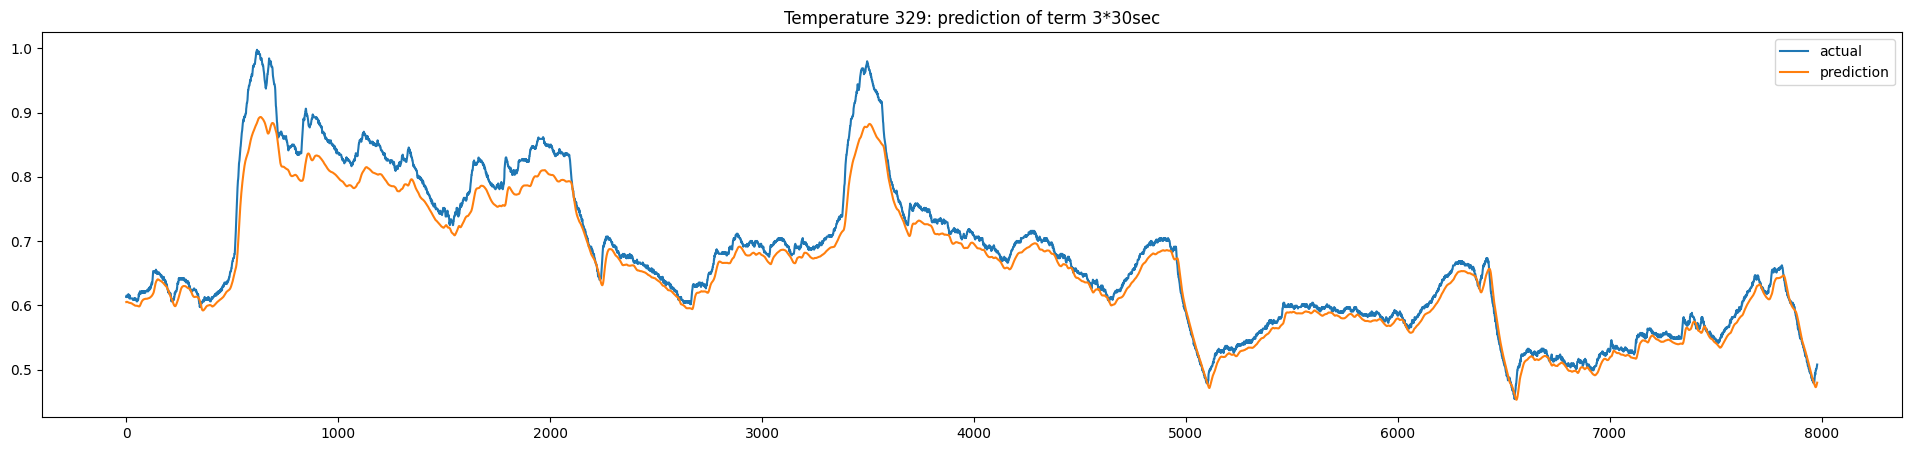

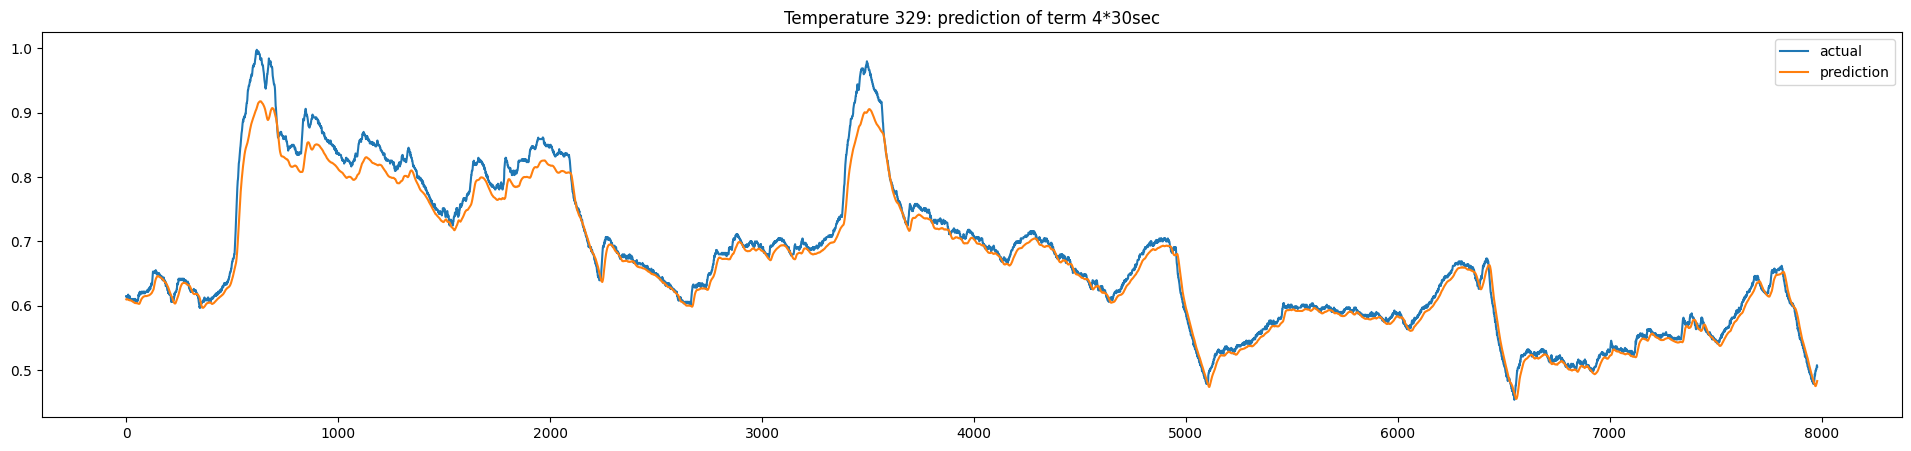

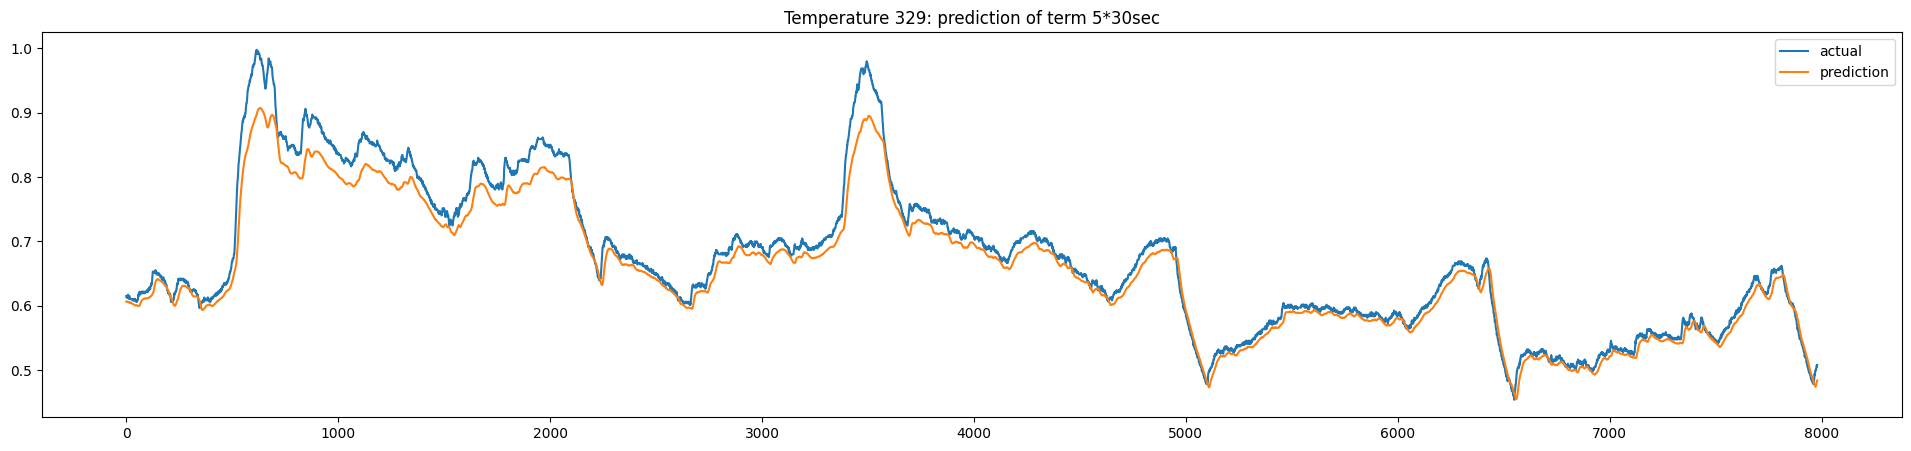

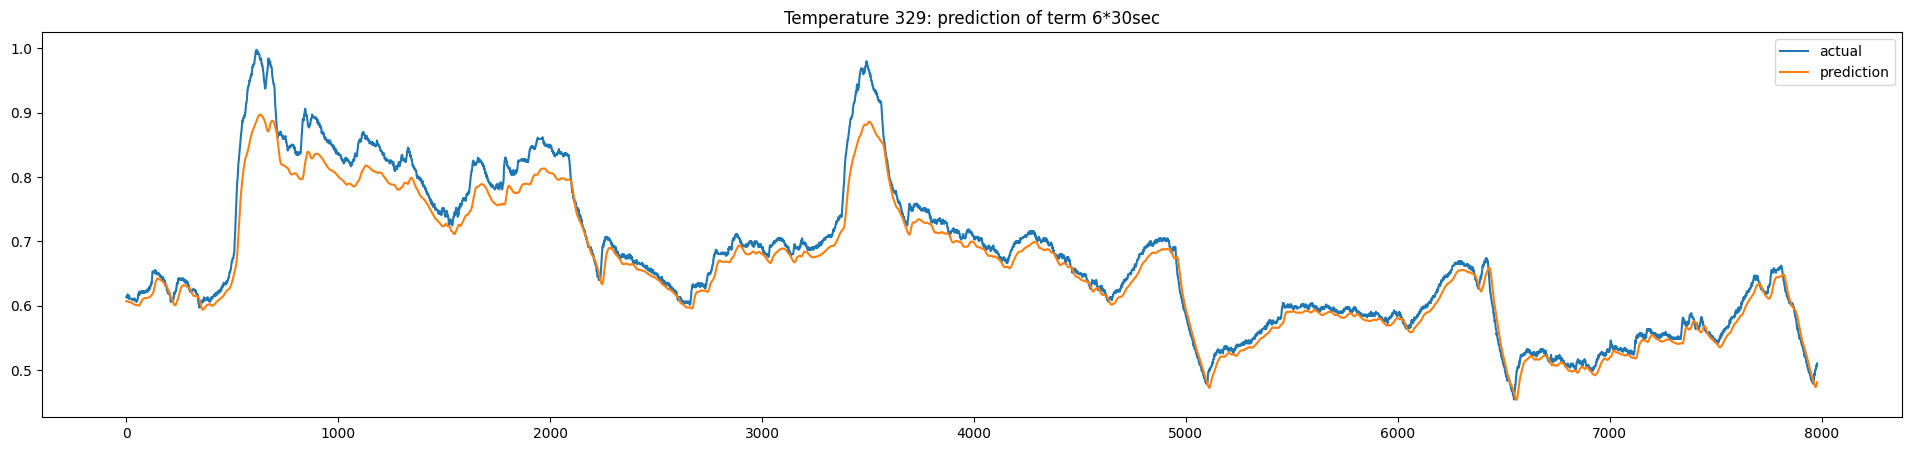

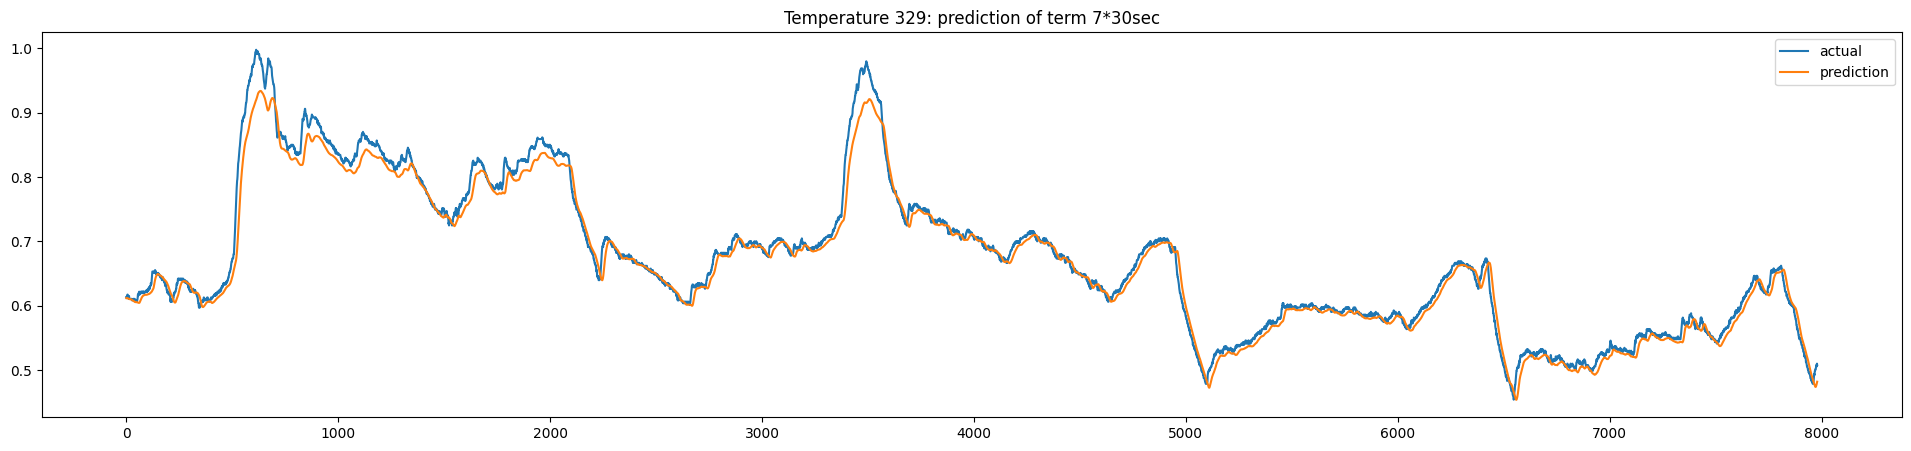

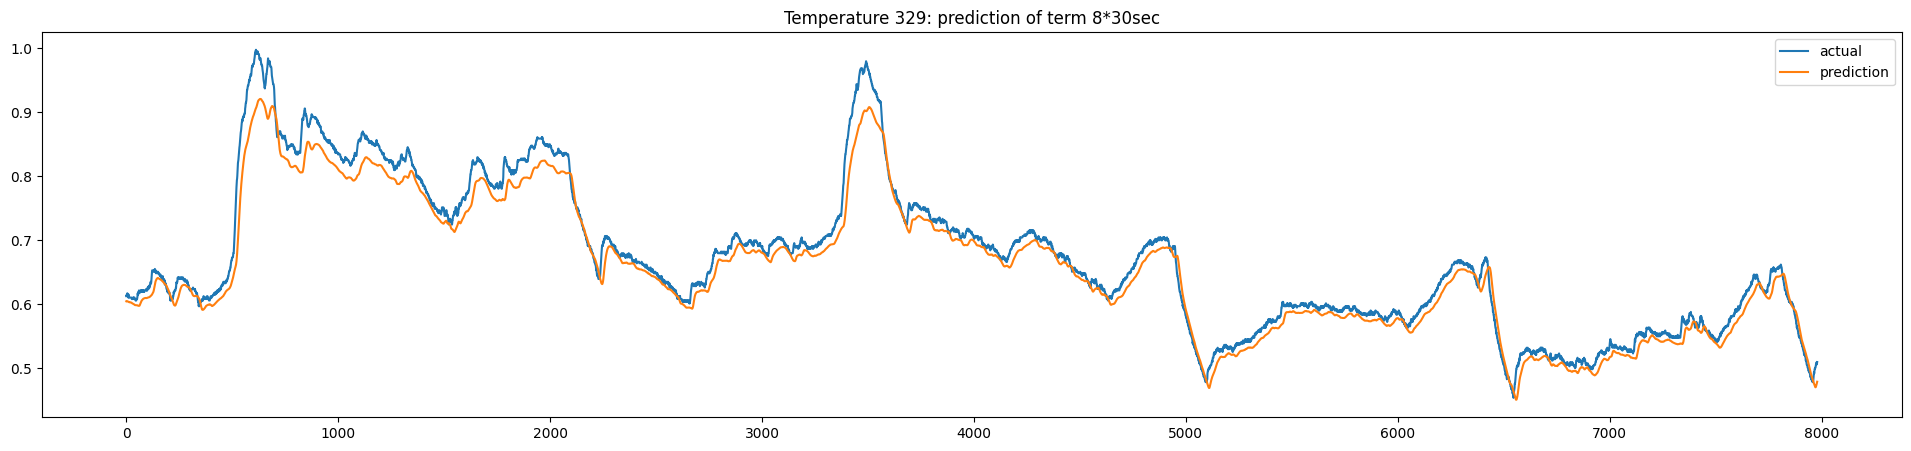

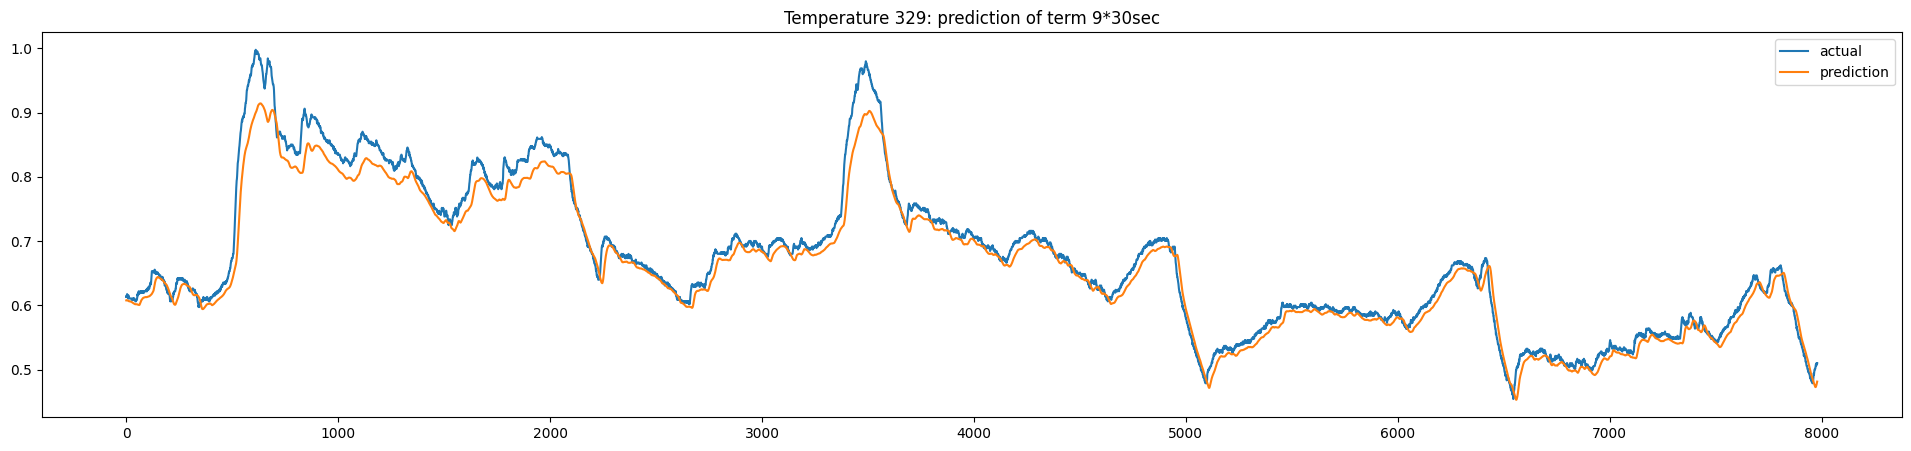

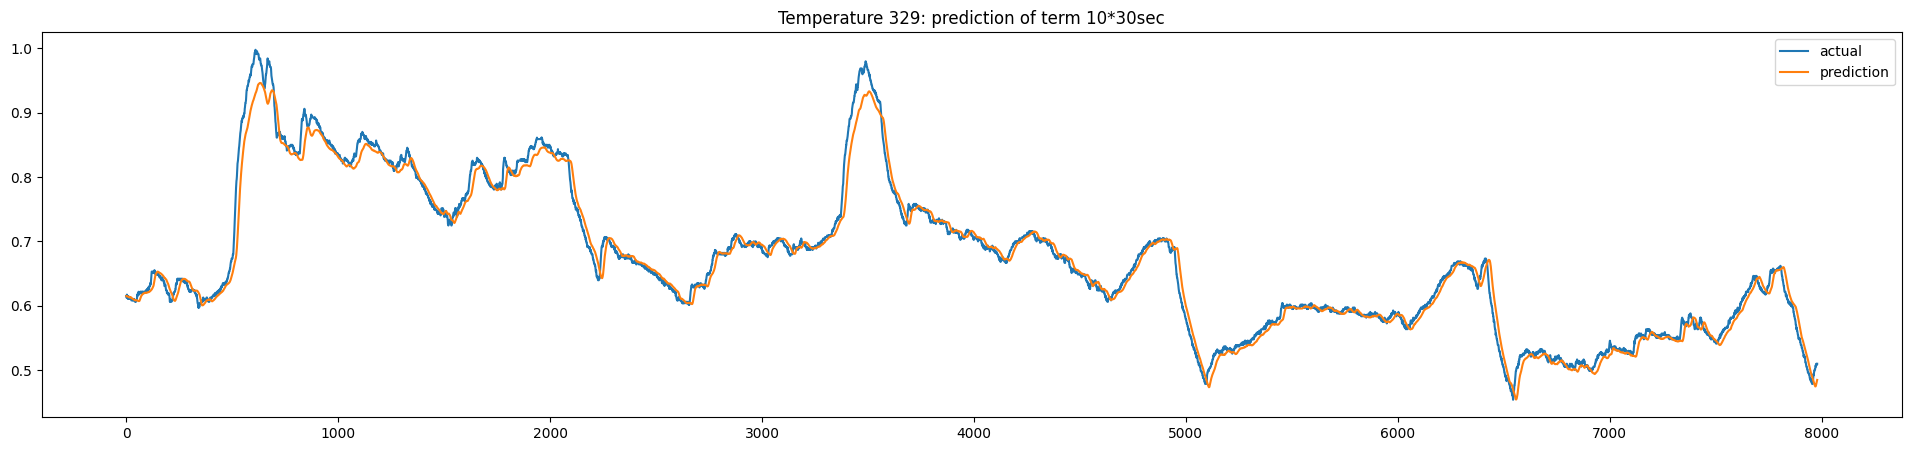

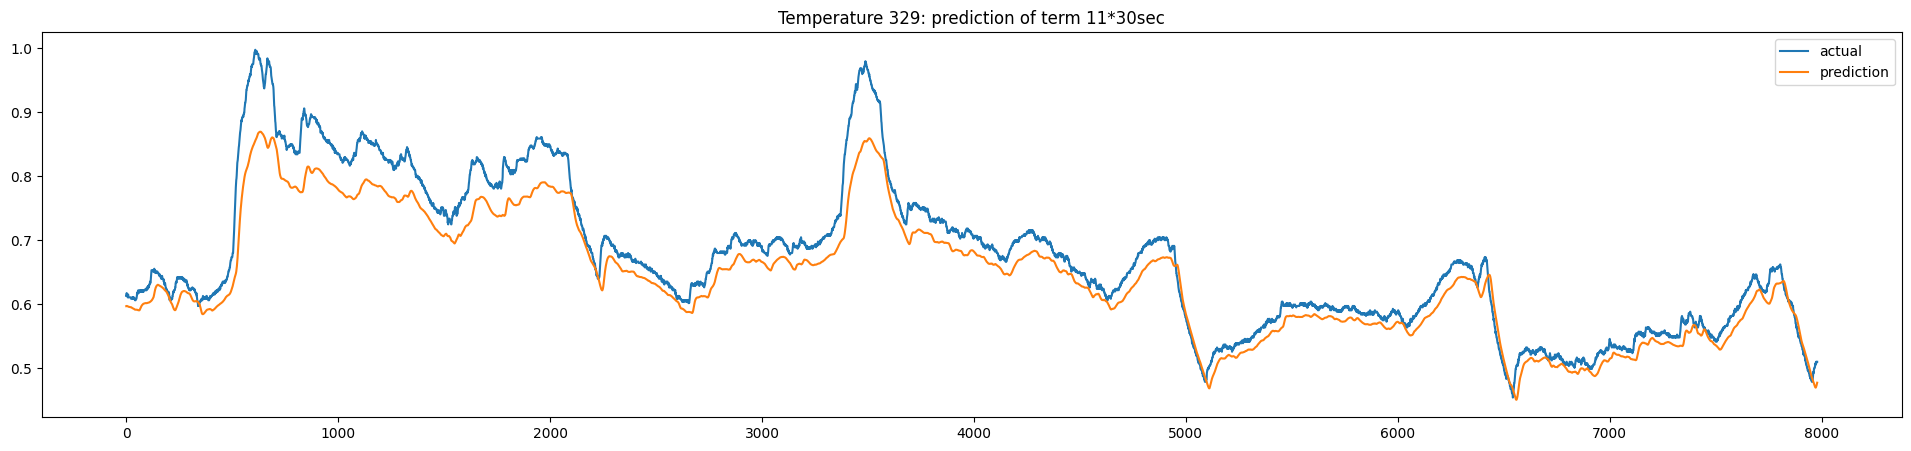

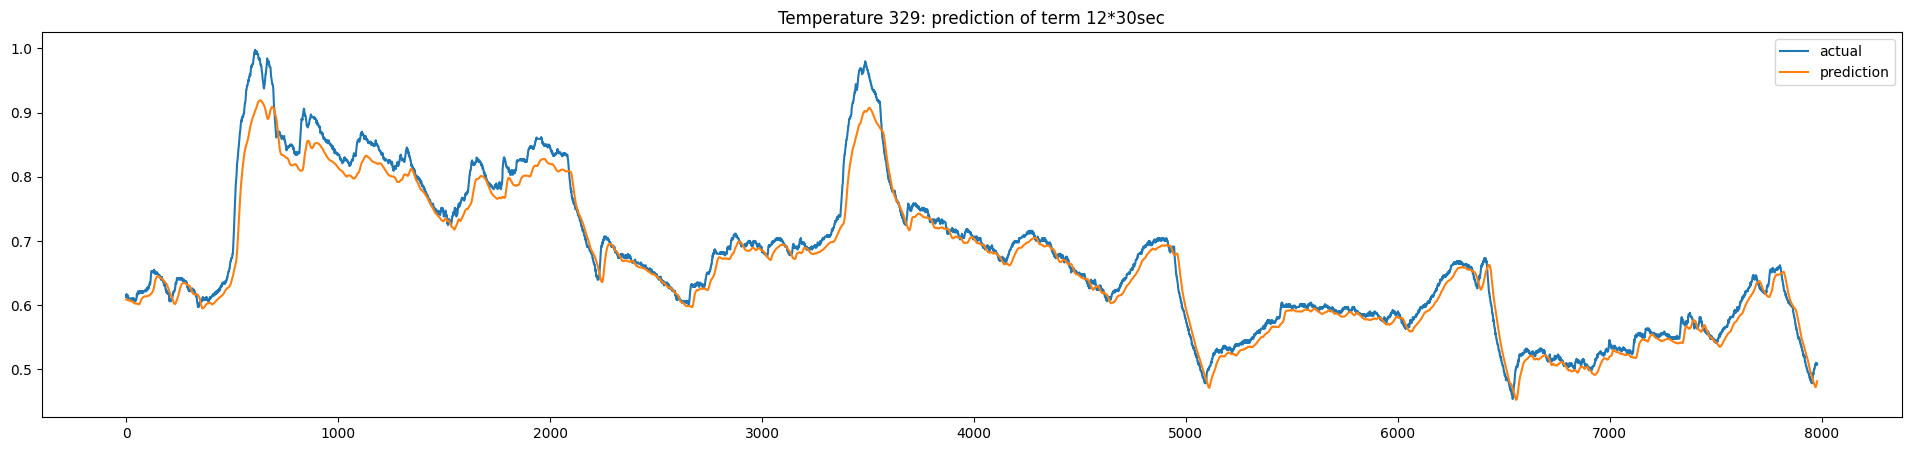

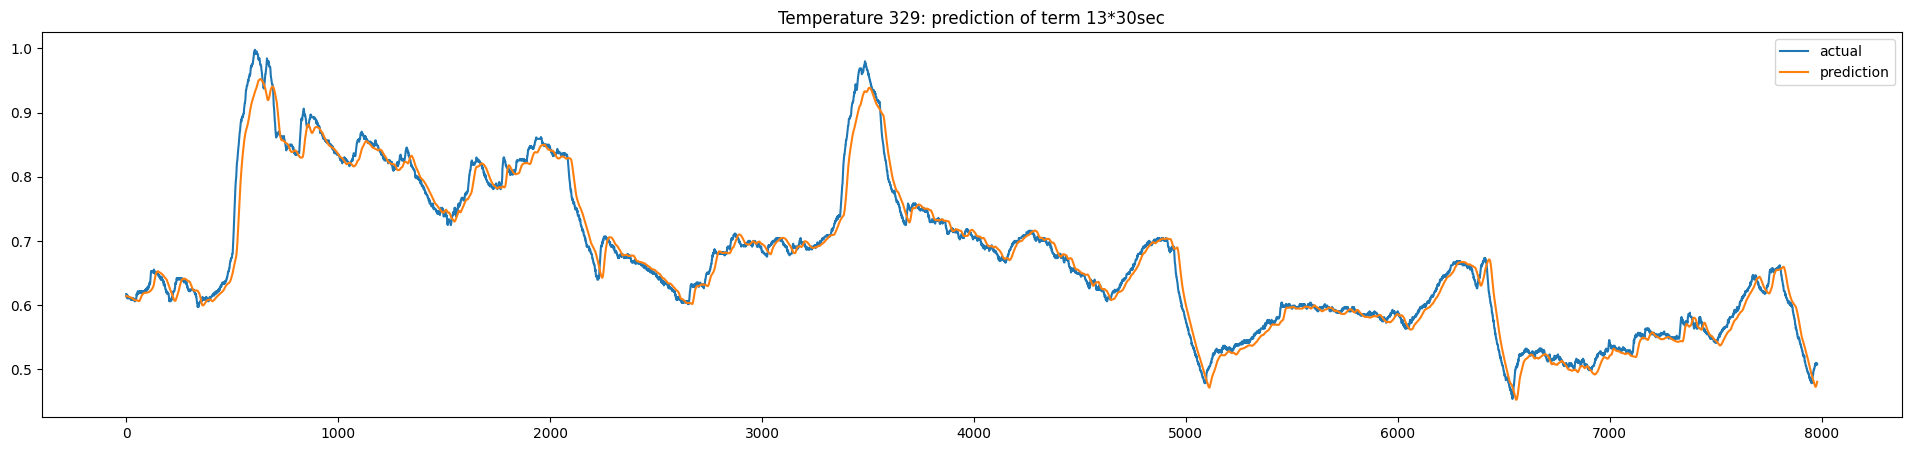

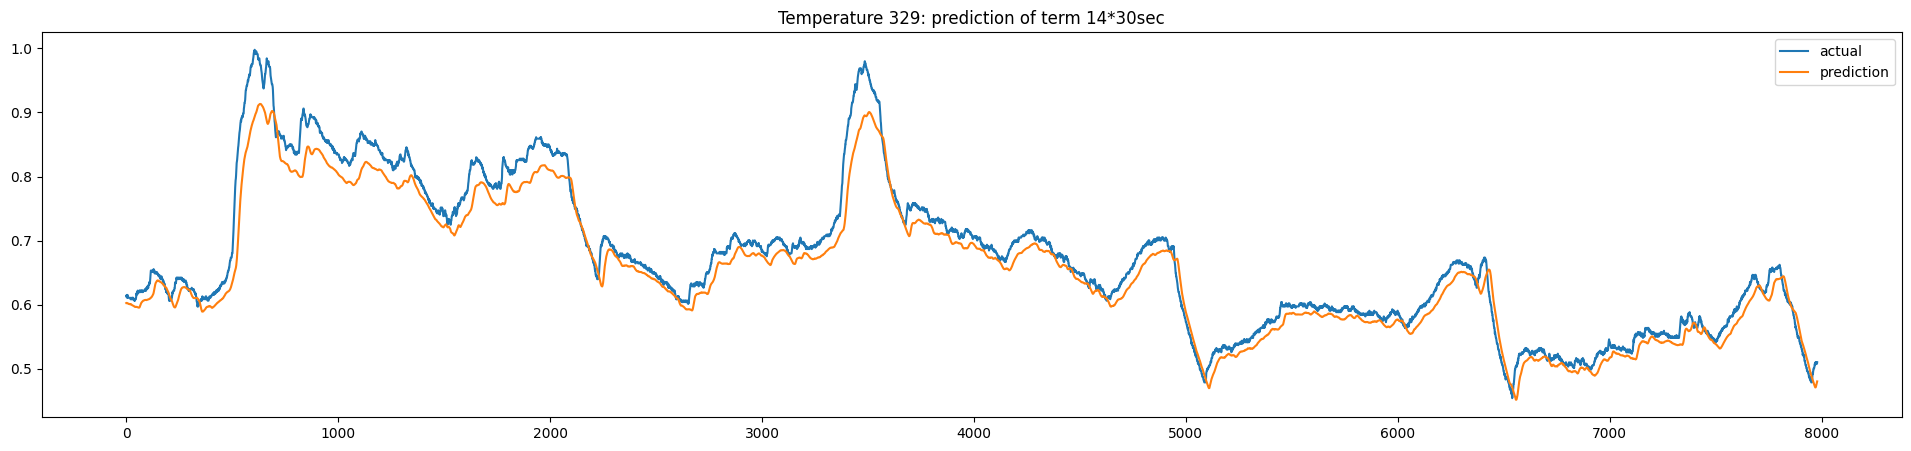

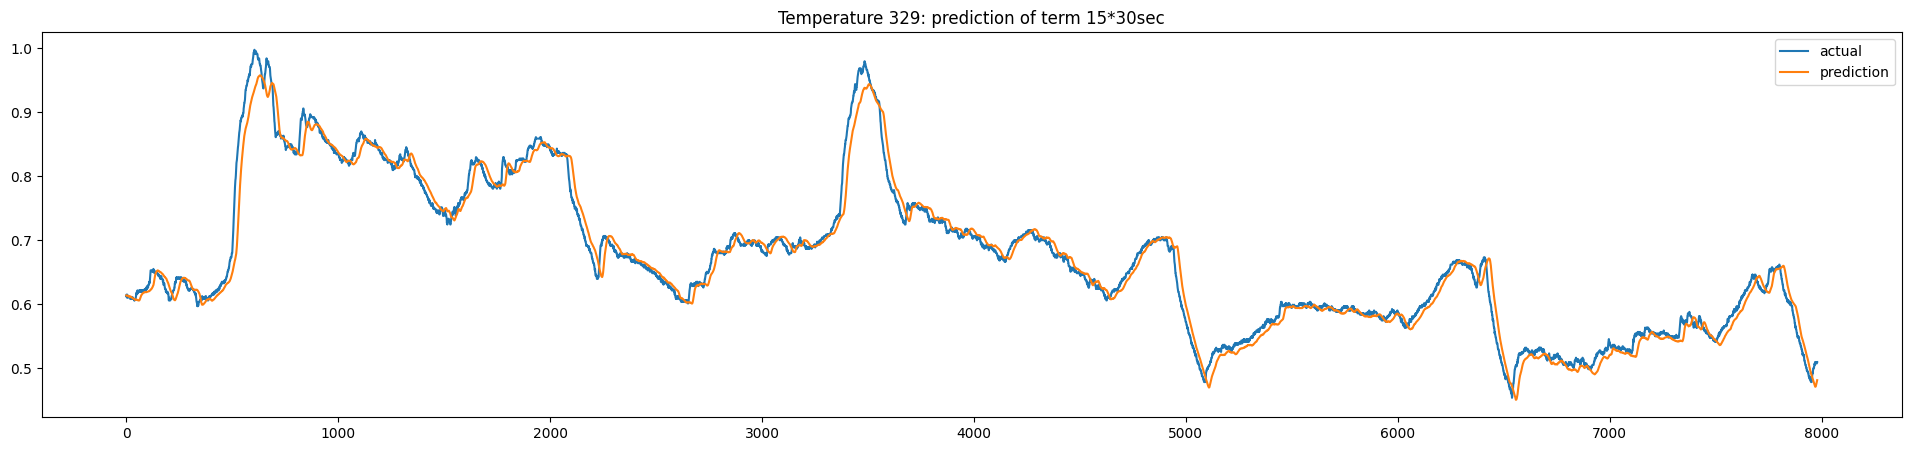

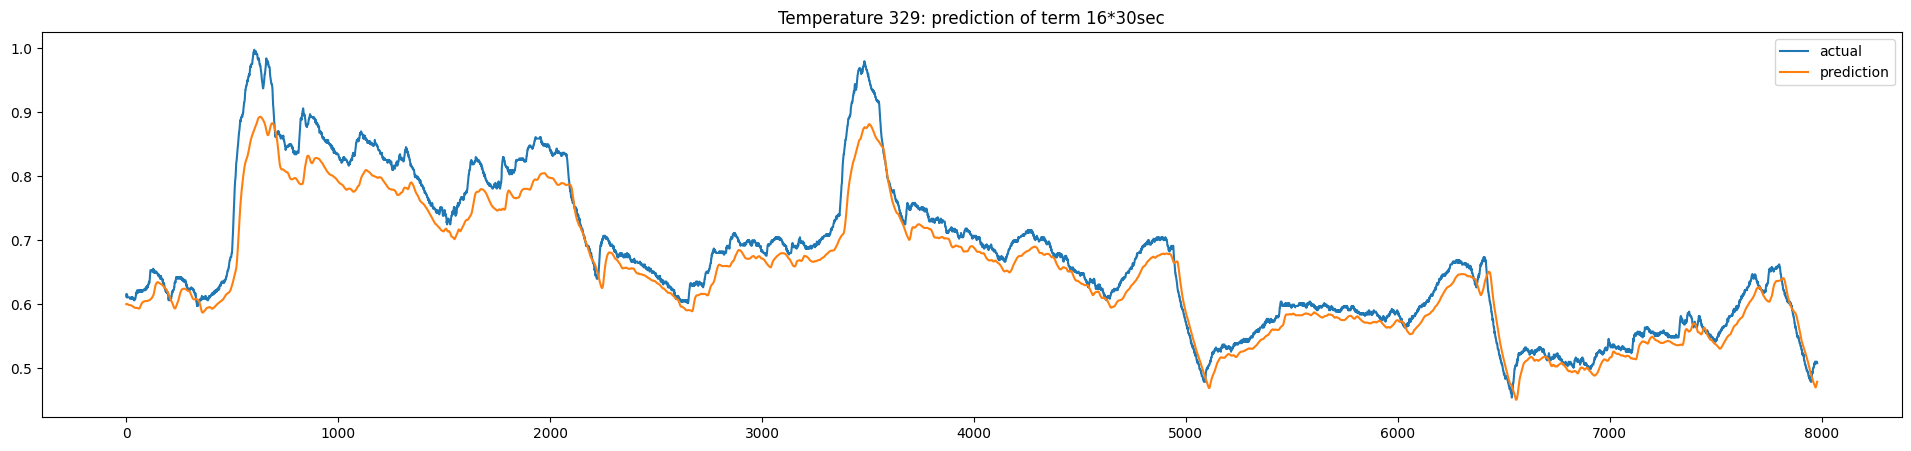

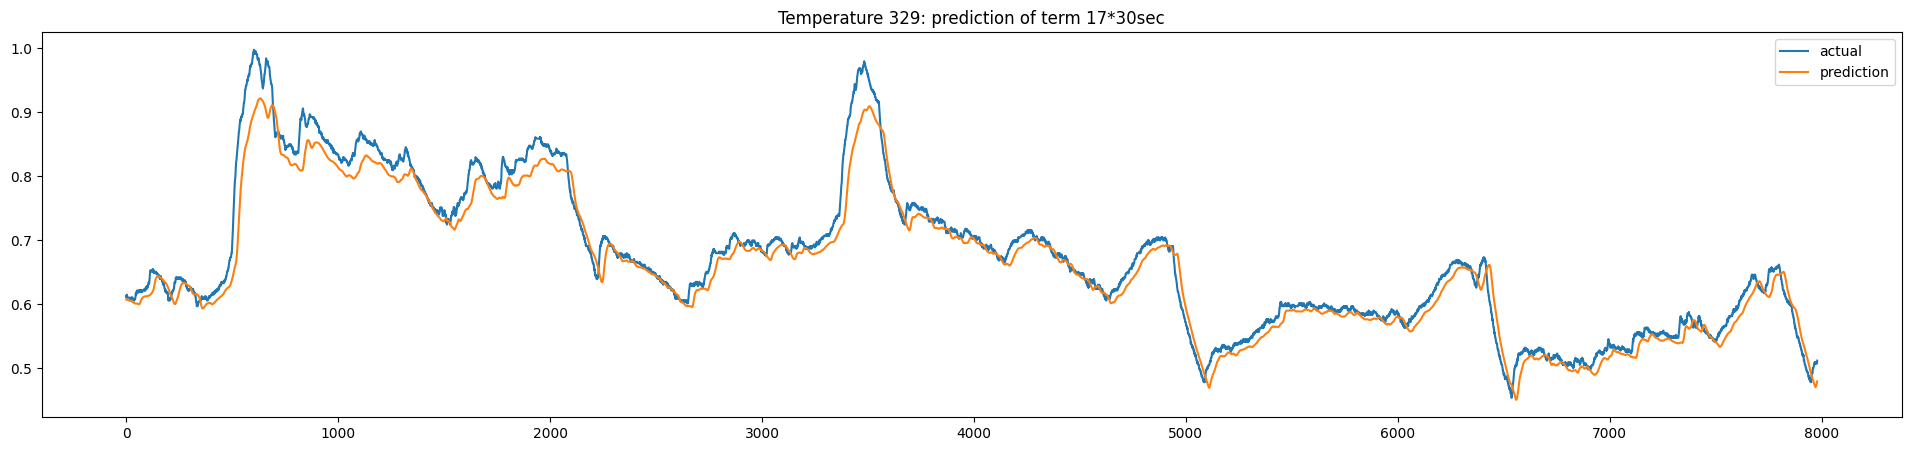

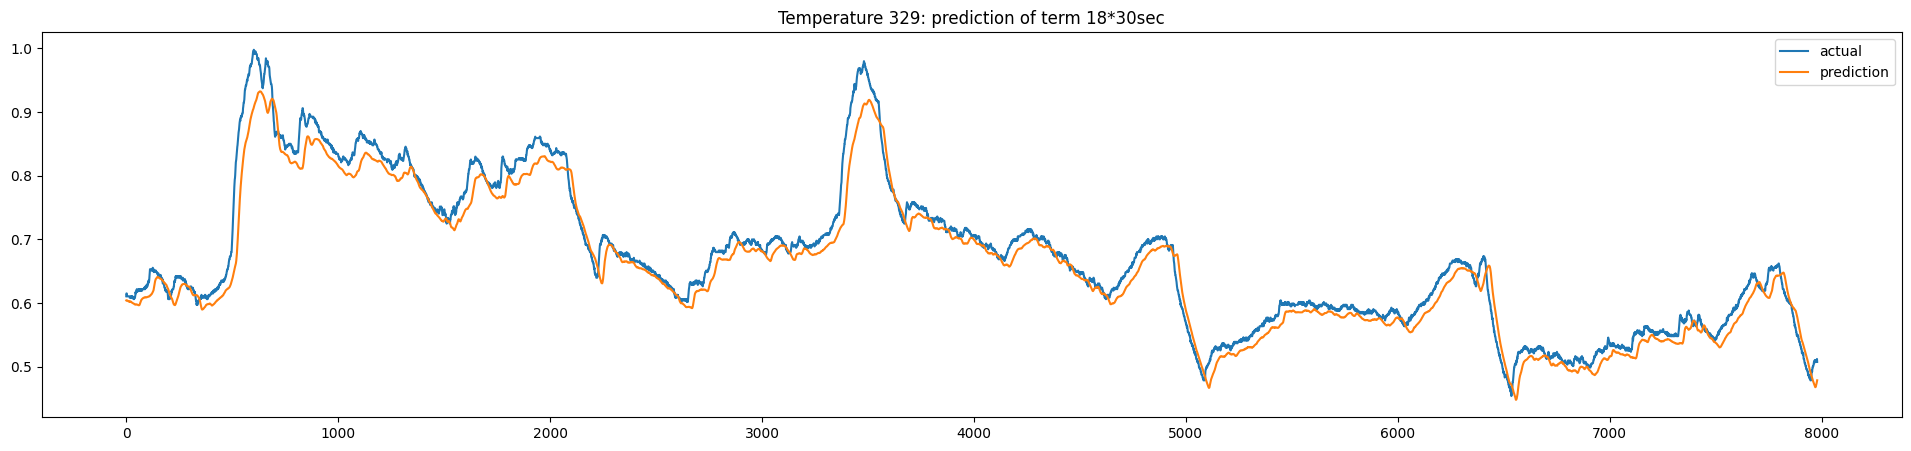

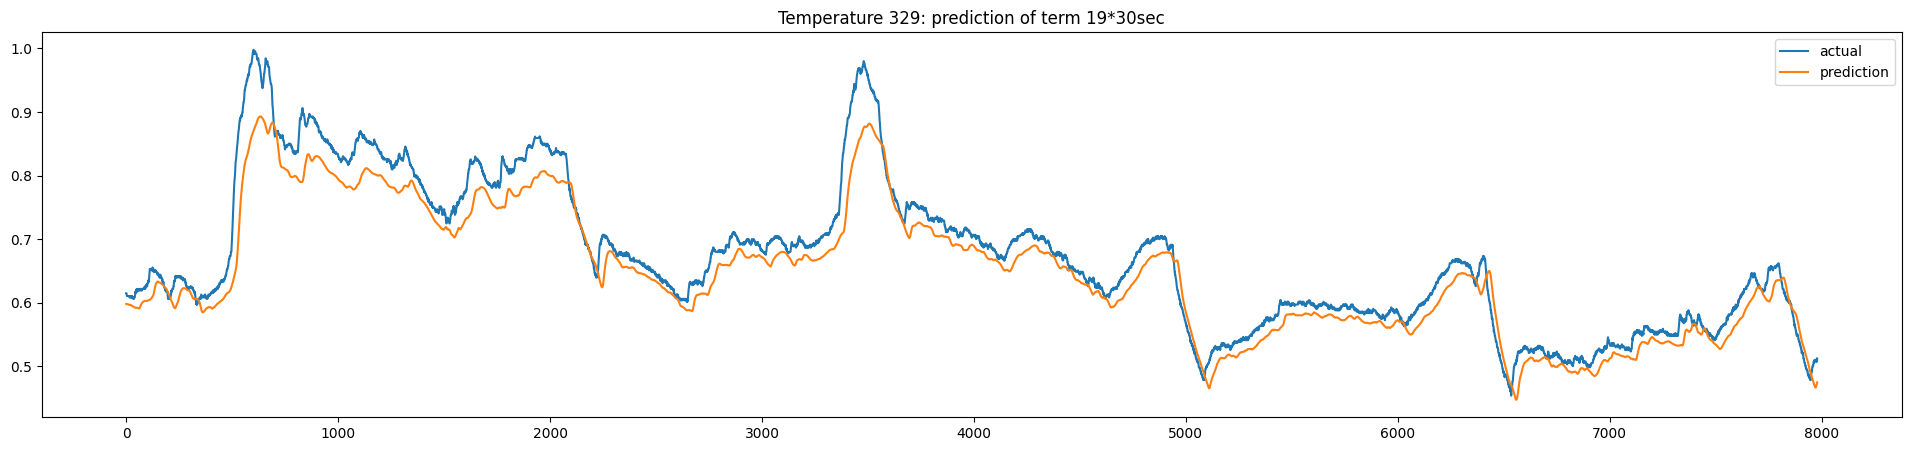

In [374]:
for i in range(len(actual_label)):

    plt.figure(figsize=(24,5))
    plt.title('Temperature 329: prediction of term {}*30sec'.format(i+1))
    plt.plot(actual_label[i], label='actual')
    plt.plot(pred2_label[i], label='prediction')
    plt.legend()
    plt.show()